In [14]:
import sys
sys.path.append('../')
# import torch
import numpy as np
import matplotlib.pyplot as plt
import itertools
import scipy as sp

from utils_reconstruction import image_similarity as imsim
import tifffile


In [15]:
## load reconstruction .npy files
num_neurons = [7863, 7908, 8202, 7939, 8122]
mouse_names = [
    "dynamic29515-10-12-Video-9b4f6a1a067fe51e15306b9628efea20",
    "dynamic29623-4-9-Video-9b4f6a1a067fe51e15306b9628efea20",
    "dynamic29647-19-8-Video-9b4f6a1a067fe51e15306b9628efea20",
    "dynamic29712-5-9-Video-9b4f6a1a067fe51e15306b9628efea20",
    "dynamic29755-2-8-Video-9b4f6a1a067fe51e15306b9628efea20",
]

max_num_neurons = np.max(num_neurons)
model_list = np.array([0,1,2,3,4,5,6]) # 1,2,3,4,5,6 # 
mice = range(0,5)
trials = range(0,10)
eval_frame_skip = 30 # default 30
mask_th = 1

video_gt=np.nan*np.ones((len(mice),len(trials),300,36,64))
behavior=np.nan*np.ones((len(mice),len(trials),2,300))
pupil_center=np.nan*np.ones((len(mice),len(trials),2,300))
responses=np.nan*np.ones((len(mice),len(trials),max_num_neurons,300))
responses_pred_gt=np.nan*np.ones((model_list.size,len(mice),len(trials),max_num_neurons,300,1)) # prediction is based on current model not ensemble
video_pred=np.nan*np.ones((model_list.size,len(mice),len(trials),300,36,64))
mask=np.nan*np.ones((len(mice),36,64))
responses_pred_recon=np.nan*np.ones((model_list.size,len(mice),len(trials),max_num_neurons,300))

training_itter_n = 101 # should find a better way of grabbing training itters
video_itter = np.nan*np.ones((model_list.size,len(mice),len(trials),training_itter_n)) 
response_loss_gt = np.nan*np.ones((model_list.size,len(mice),len(trials),1))
response_loss_full = np.nan*np.ones((model_list.size,len(mice),len(trials),training_itter_n))
response_corr_gt = np.nan*np.ones((model_list.size,len(mice),len(trials),1))
response_corr_full = np.nan*np.ones((model_list.size,len(mice),len(trials),training_itter_n))
video_corr = np.nan*np.ones((model_list.size,len(mice),len(trials),training_itter_n))
video_RMSE = np.nan*np.ones((model_list.size,len(mice),len(trials),training_itter_n))


for model_n in model_list:
    for mouse in mice:
        for trial in trials:
            datapath=f'../reconstructions/modelfold[{model_n}]_datafold_0_pop100_hpc_round5/reconstruction_summary_m{mouse}_t{trial}.npy'
            print(datapath)
            data = np.load(datapath, allow_pickle=True).item()
            if model_n==model_list[1]:
                video_gt[mouse,trial] = data['video_gt']
                behavior[mouse,trial] = data['behavior']
                pupil_center[mouse,trial] = data['pupil_center']
                responses[mouse,trial,0:num_neurons[mouse],:] = data['responses'].cpu().numpy()
            
            responses_pred_gt[model_n,mouse,trial,0:num_neurons[mouse],:,:] = data['responses_predicted_gt'].copy()
            video_pred[model_n,mouse,trial] = data['video_pred']
            mask[mouse] = data['mask'][14:14+36,:]
            responses_pred_recon[model_n,mouse,trial,0:num_neurons[mouse],:] = data['responses_predicted_full']
            
            video_itter[model_n,mouse,trial,:] = data['video_itter']
            response_loss_gt[model_n,mouse,trial,:] = data['response_loss_gt'].cpu().numpy()
            response_loss_full[model_n,mouse,trial,:] = data['response_loss_full']
            response_corr_gt[model_n,mouse,trial,:] = data['response_corr_gt']
            response_corr_full[model_n,mouse,trial] = data['response_corr_full']
            video_corr[model_n,mouse,trial,:] = data['video_corr']
            video_RMSE[model_n,mouse,trial,:] = data['video_RMSE']

            
# remove eval grace period
video_gt = video_gt[:,:,eval_frame_skip:,:,:]
behavior = behavior[:,:,:,eval_frame_skip:]
pupil_center = pupil_center[:,:,:,eval_frame_skip:]
responses = responses[:,:,:,eval_frame_skip:]
responses_pred_gt = responses_pred_gt[:,:,:,:,eval_frame_skip:]
video_pred = video_pred[:,:,:,eval_frame_skip:,:,:]
responses_pred_recon = responses_pred_recon[:,:,:,:,eval_frame_skip:]


print('video_gt: ', video_gt.shape, video_gt.min(), video_gt.max())     
print('behavior: ', behavior.shape, behavior.min(), behavior.max())
print('pupil_center: ', pupil_center.shape , pupil_center.min(), pupil_center.max())
print('responses: ', responses.shape, responses.min(), responses.max())
print('responses_pred_gt: ', responses_pred_gt.shape, responses_pred_gt.min(), responses_pred_gt.max())
print('video_pred: ', video_pred.shape, video_pred.min(), video_pred.max())
print('mask: ', mask.shape, mask.min(), mask.max())
print('responses_pred_recon: ', responses_pred_recon.shape, responses_pred_recon.min(), responses_pred_recon.max())

video_pred = np.clip(video_pred, 0, 255)


../reconstructions/modelfold[0]_datafold_0_pop100_hpc_round5/reconstruction_summary_m0_t0.npy
../reconstructions/modelfold[0]_datafold_0_pop100_hpc_round5/reconstruction_summary_m0_t1.npy
../reconstructions/modelfold[0]_datafold_0_pop100_hpc_round5/reconstruction_summary_m0_t2.npy
../reconstructions/modelfold[0]_datafold_0_pop100_hpc_round5/reconstruction_summary_m0_t3.npy
../reconstructions/modelfold[0]_datafold_0_pop100_hpc_round5/reconstruction_summary_m0_t4.npy
../reconstructions/modelfold[0]_datafold_0_pop100_hpc_round5/reconstruction_summary_m0_t5.npy
../reconstructions/modelfold[0]_datafold_0_pop100_hpc_round5/reconstruction_summary_m0_t6.npy
../reconstructions/modelfold[0]_datafold_0_pop100_hpc_round5/reconstruction_summary_m0_t7.npy
../reconstructions/modelfold[0]_datafold_0_pop100_hpc_round5/reconstruction_summary_m0_t8.npy
../reconstructions/modelfold[0]_datafold_0_pop100_hpc_round5/reconstruction_summary_m0_t9.npy
../reconstructions/modelfold[0]_datafold_0_pop100_hpc_round5

In [12]:
# ensemble and combine trials and mice
true_resp = responses.reshape((len(mice)*len(trials),max_num_neurons,300-eval_frame_skip))
pred_resp = responses_pred_gt.mean(axis=(0)).reshape((len(mice)*len(trials),max_num_neurons,300-eval_frame_skip))
recon_resp = responses_pred_recon.mean(axis=(0)).reshape((len(mice)*len(trials),max_num_neurons,300-eval_frame_skip))

# vectorize in time and neurons
true_resp = np.moveaxis(true_resp,0,-1).reshape((max_num_neurons*(300-eval_frame_skip),len(mice)*len(trials))).T
pred_resp = np.moveaxis(pred_resp,0,-1).reshape((max_num_neurons*(300-eval_frame_skip),len(mice)*len(trials))).T
recon_resp = np.moveaxis(recon_resp,0,-1).reshape((max_num_neurons*(300-eval_frame_skip),len(mice)*len(trials))).T

# correlate true_resp to pred_resp and recon_resp
corr_pred = np.zeros((len(mice)*len(trials)))
corr_recon = np.zeros((len(mice)*len(trials)))
for i in range(len(mice)*len(trials)):
    corr_pred[i] = np.corrcoef(true_resp[i],pred_resp[i])[0,1]
    corr_recon[i] = np.corrcoef(true_resp[i],recon_resp[i])[0,1]
    
print('corr_pred mean: ', np.nanmean(corr_pred), 'std: ', np.nanstd(corr_pred))
print('corr_recon mean: ', np.nanmean(corr_recon), 'std: ', np.nanstd(corr_recon))

corr_pred mean:  0.3804723677259366 std:  0.048349367257950505
corr_recon mean:  0.42257429559384496 std:  0.03396631190400146


In [ ]:
# arithmetic mean of all models
video_pred_Amean_all = np.nanmean(video_pred, axis=0)

# gaussian filtered version of arithmetic mean of all models
video_pred_Amean_all_gauss = np.zeros(video_pred_Amean_all.shape)
for mouse in range(video_pred_Amean_all.shape[0]):
    for trial in range(video_pred_Amean_all.shape[1]):
        video_pred_Amean_all_gauss[mouse,trial] = sp.ndimage.gaussian_filter(video_pred_Amean_all[mouse,trial], sigma=(0.5, 0.5, 0.5))
video_pred_Amean_all = video_pred_Amean_all_gauss

video_gt_n_pred:  (2, 5, 10, 270, 23, 28)
video_gt_n_pred:  (5, 10, 270, 46, 28)
video_gt_n_pred_hyperstack:  (270, 10, 5, 46, 28)
video_gt_n_pred:  (5, 270, 46, 280)
video_gt_n_pred_tiled:  (270, 230, 280)
video_gt_n_pred_timeseries:  (5, 10, 46, 280)
video_gt_n_pred_timeseries:  (50, 46, 280)


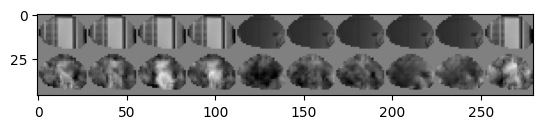

In [ ]:
# contrast adjust images
# for each movie, take the mean image across all time points, then calculate the mean and std of that image
# normalize the predicted images by subtracting the mean and dividing by the std
mouse_n,trial_n,frame_n, h_n, w_n = video_gt.shape[0],video_gt.shape[1],video_gt.shape[2],video_gt.shape[3],video_gt.shape[4]

# get target mean and std
video_gt_frame_mean = np.nanmean(video_gt, axis=-3)
video_gt_frame_mean = video_gt_frame_mean * np.where(np.expand_dims(mask,axis=1).repeat(trial_n,axis=1) >= mask_th,1,np.nan) 
target_means = np.nanmean(video_gt_frame_mean, axis=(-1,-2))
target_stds = np.nanstd(video_gt_frame_mean, axis=(-1,-2))

# get start mean and std
video_pred_frame_mean = np.nanmean(video_pred_Amean_all, axis=-3)
video_pred_frame_mean = video_pred_frame_mean * np.where(np.expand_dims(mask,axis=1).repeat(trial_n,axis=1) >= mask_th,1,np.nan) 
start_means = np.nanmean(video_pred_frame_mean, axis=(-1,-2))
start_stds = np.nanstd(video_pred_frame_mean, axis=(-1,-2))

# expand dims of mean and std in time h and w
target_means = np.expand_dims(target_means,axis=(2,3,4)).repeat(frame_n,axis=-3).repeat(h_n,axis=-2).repeat(w_n,axis=-1)
target_stds = np.expand_dims(target_stds,axis=(2,3,4)).repeat(frame_n,axis=-3).repeat(h_n,axis=-2).repeat(w_n,axis=-1)
start_means = np.expand_dims(start_means,axis=(2,3,4)).repeat(frame_n,axis=-3).repeat(h_n,axis=-2).repeat(w_n,axis=-1)
start_stds = np.expand_dims(start_stds,axis=(2,3,4)).repeat(frame_n,axis=-3).repeat(h_n,axis=-2).repeat(w_n,axis=-1)

# # z-score predicted video
# video_pred_zscore = (video_pred_Amean_all - start_means) / start_stds
# video_pred_norm = video_pred_zscore * (target_stds) + target_means
video_pred_zscore = (video_pred_Amean_all - start_means)  / start_stds
video_pred_norm = (video_pred_zscore*target_stds) + target_means
video_pred_norm = np.clip(video_pred_norm, 0, 255)
# video_pred_norm = video_pred_Amean_all # no z-scoring

# reaply mask
mask_expanded = np.expand_dims(mask,axis=(1,2)).repeat(trial_n,axis=1).repeat(frame_n,axis=2)
video_gt_masked = video_gt * np.where(mask_expanded >= mask_th,1,np.nan) 
video_pred_Amean_all_masked = video_pred_Amean_all * np.where(mask_expanded >= mask_th,1,np.nan) 
video_pred_norm_masked = video_pred_norm * np.where(mask_expanded >= mask_th,1,np.nan)

video_gt_masked[np.isnan(video_gt_masked)] = 255/2
video_pred_Amean_all_masked[np.isnan(video_pred_Amean_all_masked)] = 255/2
video_pred_norm_masked[np.isnan(video_pred_norm_masked)] = 255/2

# apply crop to masks based
mask_all = np.where(np.sum(np.where(mask >= mask_th,1,0),axis=0) >= 1,1,0)
mask_all_idx = np.where(mask_all == 1)
h_min, h_max = np.min(mask_all_idx[0]), np.max(mask_all_idx[0])
w_min, w_max = np.min(mask_all_idx[1]), np.max(mask_all_idx[1])
h = h_max - h_min
w = w_max - w_min
video_gt_masked=video_gt_masked[:,:,:,h_min:h_max,w_min:w_max]
video_pred_norm_masked=video_pred_norm_masked[:,:,:,h_min:h_max,w_min:w_max]

#tile videos based on gt vs pred (dim 0) as rows and trial as columns
video_gt_n_pred = np.concatenate((np.expand_dims(video_gt_masked,axis=0),np.expand_dims(video_pred_norm_masked,axis=0)),axis=0) 
print('video_gt_n_pred: ', video_gt_n_pred.shape)
video_gt_n_pred = np.moveaxis(np.moveaxis(video_gt_n_pred,-2,1).reshape((2*h,mouse_n,trial_n,frame_n,w)),0,-2)
print('video_gt_n_pred: ', video_gt_n_pred.shape)
video_gt_n_pred_hyperstack=np.transpose(video_gt_n_pred.copy(),(2,1,0,3,4))
print('video_gt_n_pred_hyperstack: ', video_gt_n_pred_hyperstack.shape)

# tiled videos
video_gt_n_pred = np.moveaxis(np.moveaxis(video_gt_n_pred,(1,-1),(0,1)).reshape((trial_n*w,mouse_n,frame_n,h*2)),0,-1) # tile mice in hight
print('video_gt_n_pred: ', video_gt_n_pred.shape)
video_gt_n_pred_tiled = np.moveaxis(np.moveaxis(video_gt_n_pred,-2,1).reshape((2*h*mouse_n,frame_n,w*trial_n)),0,-2) # tile trials and width
print('video_gt_n_pred_tiled: ', video_gt_n_pred_tiled.shape)
plt.imshow(video_gt_n_pred_tiled[100,:,:],cmap='gray',vmin=0,vmax=255)

# time series of video # 1 frame per second
choose_frames = np.concatenate((np.arange(0,video_gt_n_pred_hyperstack.shape[0],30).astype(int),[video_gt_n_pred_hyperstack.shape[0]-1]))
number_of_frames = choose_frames.shape[0]

video_gt_n_pred = video_gt_n_pred_hyperstack[choose_frames,:,:,:,:].copy()
video_gt_n_pred_timeseries = np.moveaxis(np.moveaxis(video_gt_n_pred,(-1),(1)).reshape((w*number_of_frames,mouse_n,trial_n,h*2)),0,-1)# tile time in width
print('video_gt_n_pred_timeseries: ', video_gt_n_pred_timeseries.shape)
video_gt_n_pred_timeseries = video_gt_n_pred_timeseries.reshape((mouse_n*trial_n,h*2,w*number_of_frames))# tile time in width
print('video_gt_n_pred_timeseries: ', video_gt_n_pred_timeseries.shape)

plt.imshow(video_gt_n_pred_timeseries[1,:],cmap='gray',vmin=0,vmax=255) 

# save original videos
tifffile.imwrite('../reconstructions/all_original_videos.tiff', 
                np.transpose(video_gt.astype('uint8'),(2,1,0,3,4)),
                imagej=True,
                metadata = {'unit': 'um','fps': 30.0,'axes': 'TZCYX',})

# save video as tiff
tifffile.imwrite('../reconstructions/all_processed_videos_tiled.tiff', 
                video_gt_n_pred_tiled.astype('uint8'),
                imagej=True,
                metadata = {'unit': 'um','fps': 30.0,'axes': 'TYX',})
# save video as tiff
tifffile.imwrite('../reconstructions/all_processed_videos_hyperstack.tiff', 
                video_gt_n_pred_hyperstack.astype('uint16'),
                imagej=True,
                metadata = {'unit': 'um','fps': 30.0,'axes': 'TZCYX',})
# save video as tiff
tifffile.imwrite('../reconstructions/all_processed_videos_time_series.tiff', 
                video_gt_n_pred_timeseries.astype('uint16'),
                imagej=True,
                metadata = {'unit': 'um','fps': 30.0,'axes': 'ZYX',})

In [13]:
# time series of video # 1 frame per second
choose_frames = np.concatenate((np.arange(0,video_gt_n_pred_hyperstack.shape[0],30).astype(int),[video_gt_n_pred_hyperstack.shape[0]-1]))
number_of_frames = choose_frames.shape[0]
print(choose_frames)

NameError: name 'video_gt_n_pred_hyperstack' is not defined

/tmp/ipykernel_2828425/1236616555.py:24: RuntimeWarning: Mean of empty slice
  video_corr_avg.append(np.nanmean(video_corr[model_n,:,:,:], axis=(0,1)))


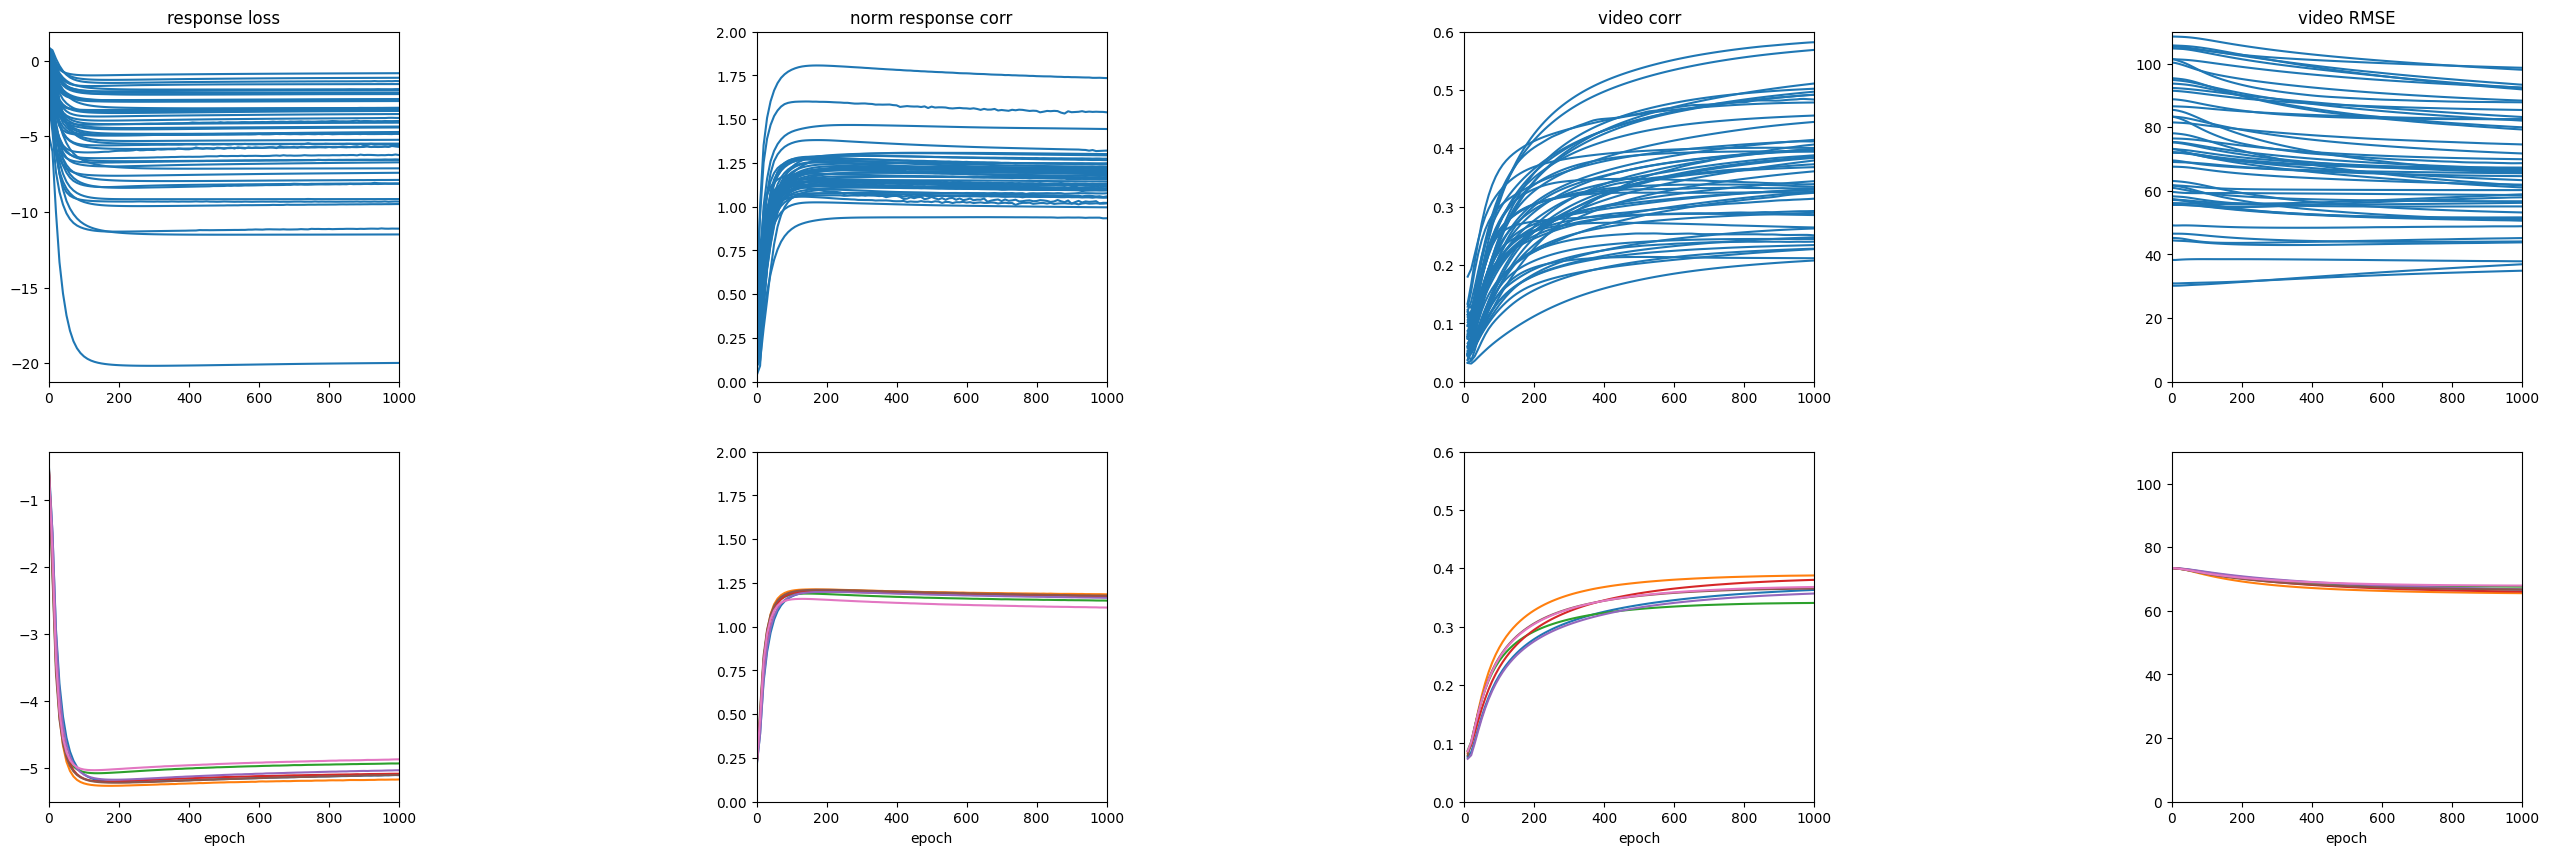

In [735]:
## summary of training
fig, axs = plt.subplots(2, 4, figsize=(35, 10))

for model_n in model_list:
    response_loss_full_avg = []
    response_corr_full_avg = []
    video_corr_avg = []
    video_RMSE_avg = []

    for mouse in mice:
        for trial in trials:
            # response_loss_full_avg.append(response_loss_full[model_n,mouse,trial,:])
            # response_corr_full_avg.append(response_corr_full[model_n,mouse,trial,:]/response_corr_gt[model_n,mouse,trial,:])
            # video_corr_avg.append(video_corr[model_n,mouse,trial,:])
            # video_RMSE_avg.append(video_RMSE[model_n,mouse,trial,:])
            
            if model_n==0:
                axs[0,0].plot(video_itter[model_n,mouse,trial,:], response_loss_full[model_n,mouse,trial,:],color='C'+str(model_n))
                axs[0,1].plot(video_itter[model_n,mouse,trial,:], response_corr_full[model_n,mouse,trial,:]/response_corr_gt[model_n,mouse,trial,:],color='C'+str(model_n))
                axs[0,2].plot(video_itter[model_n,mouse,trial,:], video_corr[model_n,mouse,trial,:],color='C'+str(model_n))
                axs[0,3].plot(video_itter[model_n,mouse,trial,:], video_RMSE[model_n,mouse,trial,:],color='C'+str(model_n))
    response_loss_full_avg.append(np.nanmean(response_loss_full[model_n,:,:,:], axis=(0,1)))
    response_corr_full_avg.append(np.nanmean(response_corr_full[model_n,:,:,:]/response_corr_gt[model_n,:,:,:], axis=(0,1)))
    video_corr_avg.append(np.nanmean(video_corr[model_n,:,:,:], axis=(0,1)))
    video_RMSE_avg.append(np.nanmean(video_RMSE[model_n,:,:,:], axis=(0,1)))
    axs[1,0].plot(video_itter[model_n,mouse,trial,:], response_loss_full_avg[-1],color='C'+str(model_n))
    axs[1,1].plot(video_itter[model_n,mouse,trial,:], response_corr_full_avg[-1],color='C'+str(model_n))
    axs[1,2].plot(video_itter[model_n,mouse,trial,:], video_corr_avg[-1],color='C'+str(model_n))
    axs[1,3].plot(video_itter[model_n,mouse,trial,:], video_RMSE_avg[-1],color='C'+str(model_n))
            
for j in range(4):
    axs[1,j].set_xlabel('epoch')
    axs[0,j].set_xlim([0,1000])
    axs[1,j].set_xlim([0,1000])
for i in range(0,2):
    axs[0,0].set_title('response loss')
    # axs[i,0].set_ylim([0,1.4])
    axs[0,1].set_title('norm response corr')
    axs[i,1].set_ylim([0,2])
    axs[0,2].set_title('video corr')
    axs[i,2].set_ylim([0,0.6])
    axs[0,3].set_title('video RMSE')
    axs[i,3].set_ylim([0,110])

for i in range(0,2):
    for j in range(4):
        axs[i,j].set_box_aspect(1)

# save as svg
plt.savefig('../reconstructions/training_summary.svg', format='svg', dpi=1200)

In [736]:
## some data transformations

def apply_flatten_with_masking(video, mask, mask_th=1, keep_frames=False):
    # video can be either: mouse, trial, frames, 36, 64 or model, mouse, trial, frames, 36, 64. i.e. dim 5 or 6
    # mask is: mouse, 36, 64
    # output: list masked and flattened videos with (list: mouse[model,trial,frame*36*64])
    mask = np.where(mask >= mask_th,1,np.nan)
    idx_inmask = []
    for mouse in range(mask.shape[0]):
        idx = mask[mouse].flatten() == 1
        idx_inmask.append(idx.nonzero()[0])
        
    if len(video.shape) == 5: # mouse, trial, frames, 36, 64
        video = video.reshape((video.shape[0],video.shape[1],video.shape[2],36*64)) ############ dangerous check
        masked_video_list = []  
        for mouse in range(video.shape[0]):
            tempvid = video[mouse]
            masked_video_list.append(tempvid[:,:,idx_inmask[mouse]])
        
            if keep_frames == False:
                masked_video_list[mouse] = masked_video_list[mouse].reshape((video.shape[1],-1))
            
    elif len(video.shape) == 6: # model, mouse, trial, frames, 36, 64
        video = video.reshape((video.shape[0],video.shape[1],video.shape[2],video.shape[3],36*64))
        masked_video_list = []  
        for mouse in range(video.shape[1]):
            tempvid = video[:,mouse]
            masked_video_list.append(tempvid[:,:,:,idx_inmask[mouse]])
        
            if keep_frames == False:
                masked_video_list[mouse] = masked_video_list[mouse].reshape((video.shape[0],video.shape[2],-1))
    
    return masked_video_list

print('video_gt: ', video_gt.shape)
video_gt_masked_flat_frame = apply_flatten_with_masking(video_gt,mask,keep_frames=True)
print('flat_video_gt_masked: ', len(video_gt_masked_flat_frame), video_gt_masked_flat_frame[0].shape)
video_gt_masked_flat_vid = apply_flatten_with_masking(video_gt,mask)
print('flat_video_gt_masked: ', len(video_gt_masked_flat_vid), video_gt_masked_flat_vid[0].shape)
print('----------')
print('video_pred: ', video_pred.shape)
video_pred_masked_flat_frame = apply_flatten_with_masking(video_pred,mask,keep_frames=True)
print('flat_video_pred_masked: ', len(video_pred_masked_flat_frame), video_pred_masked_flat_frame[0].shape)
video_pred_masked_flat_vid = apply_flatten_with_masking(video_pred,mask)
print('flat_video_pred_masked: ', len(video_pred_masked_flat_vid), video_pred_masked_flat_vid[0].shape)


video_gt:  (5, 10, 270, 36, 64)
flat_video_gt_masked:  5 (10, 270, 346)
flat_video_gt_masked:  5 (10, 93420)
----------
video_pred:  (7, 5, 10, 270, 36, 64)
flat_video_pred_masked:  5 (7, 10, 270, 346)
flat_video_pred_masked:  5 (7, 10, 93420)


In [17]:
## Average model outputs 
# compare performance with different model numbers and different average methods
# and try fourier filtering in time domain
corr_avg_per_sample_size_median=[]
corr_avg_per_sample_size_mean=[]
corr_avg_per_sample_std=[]
corr_avg_per_sample_size_median_rand=[]
corr_avg_per_sample_size_mean_rand=[]
corr_avg_per_sampel_std_rand=[]

corr_allmice_per_sample_size = np.zeros((model_list.size,len(mice)))
corr_allmice_per_sample_size_rand = np.zeros((model_list.size,len(mice)))

# Generate combinations for sample sizes 1 to 5
for r in (1,model_list.size): # only single and full ensemble for full range do (range(1, model_list.size+1))
    # Generate all unique combinations of the numbers with sample size r
    combinations = list(itertools.combinations(range(0, model_list.size), r))
    corr_avg_per_sample_mean=[]
    corr_avg_per_sample_mean_rand=[]

    # Calculate the average of each combination and append it to the list
    for mouse in range(len(mice)):
        corr_accum_mean = []
        corr_accum_mean_rand = []
        
        for combination in combinations: # only do single and full ensemble
            combination = np.array(combination)
            for trial in range(len(trials)):
                
                # ensemble and no smooth
                # recon_temp = sp.ndimage.gaussian_filter(np.mean(video_pred[combination,mouse,trial],axis=0), sigma=(0.5, 0.5, 0.5))
                recon_temp = np.mean(video_pred[combination,mouse,trial],axis=0)

                # corr to gt
                corr_accum_mean.append(imsim.reconstruction_video_mean_frame_corr(video_gt[mouse,trial],
                                            recon_temp,
                                            np.where(mask[mouse] >= mask_th,1,0)))     
                
                # corr to random image
                #random trial excluding current trial
                random_tial = np.random.choice([x for x in range(len(trials)) if x != trial])

                corr_accum_mean_rand.append(imsim.reconstruction_video_mean_frame_corr(video_gt[mouse,random_tial],
                                          recon_temp,
                                          np.where(mask[mouse] >= mask_th,1,0)))                                 

        corr_avg_per_sample_mean.append(np.mean(corr_accum_mean))
        corr_avg_per_sample_mean_rand.append(np.mean(corr_accum_mean_rand))

    corr_allmice_per_sample_size[r-1,:] = corr_avg_per_sample_mean
    corr_allmice_per_sample_size_rand[r-1,:] = corr_avg_per_sample_mean_rand
    
    corr_avg_per_sample_size_mean.append(np.mean(corr_avg_per_sample_mean))
    corr_avg_per_sample_std.append(np.std(corr_avg_per_sample_mean))
    corr_avg_per_sample_size_mean_rand.append(np.mean(corr_avg_per_sample_mean_rand))
    corr_avg_per_sampel_std_rand.append(np.std(corr_avg_per_sample_mean_rand))

print('For Benchmarking unsmoothed reconstructions')
print('Ensembeld frame corr for all animals: ', corr_allmice_per_sample_size[-1,:])
print('mean (std): ',  corr_allmice_per_sample_size[-1,:].mean(), corr_allmice_per_sample_size[-1,:].std())
print('Single model frame corr for all animals: ', corr_allmice_per_sample_size[0,:])
print('mean (std): ',  corr_allmice_per_sample_size[0,:].mean(), corr_allmice_per_sample_size[0,:].std())

# make sure corr_allmice_per_sample_size is overwriten in the next cell using video correlation

/ceph/margrie/joelb/video_reconstruction_from_sensorium2023_winner/venv3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/ceph/margrie/joelb/video_reconstruction_from_sensorium2023_winner/venv3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


For Benchmarking unsmoothed reconstructions
Ensembeld frame corr for all animals:  [0.45900998 0.43031005 0.5421413  0.4564895  0.43571055]
mean (std):  0.46473227754302276 0.040298872277761515
Single model frame corr for all animals:  [0.31001527 0.281891   0.38900702 0.31335084 0.28430067]
mean (std):  0.31571295956939777 0.03883482685804522


In [16]:
## Average model outputs 
# compare performance with different model numbers and different average methods
# and try fourier filtering in time domain
corr_avg_per_sample_size_median=[]
corr_avg_per_sample_size_mean=[]
corr_avg_per_sample_std=[]
corr_avg_per_sample_size_median_rand=[]
corr_avg_per_sample_size_mean_rand=[]
corr_avg_per_sampel_std_rand=[]

corr_allmice_per_sample_size = np.zeros((model_list.size,len(mice)))
corr_allmice_per_sample_size_rand = np.zeros((model_list.size,len(mice)))

# Generate combinations for sample sizes 1 to 5
for r in range(1, model_list.size+1):
    # Generate all unique combinations of the numbers with sample size r
    combinations = list(itertools.combinations(range(0, model_list.size), r))
    corr_avg_per_sample_mean=[]
    corr_avg_per_sample_mean_rand=[]

    # Calculate the average of each combination and append it to the list
    for mouse in range(len(mice)):
        corr_accum_mean = []
        corr_accum_mean_rand = []
        
        for combination in combinations:
            combination = np.array(combination)
            for trial in range(len(trials)):

                # ensemble and smooth
                recon_temp = sp.ndimage.gaussian_filter(np.mean(video_pred[combination,mouse,trial],axis=0), sigma=(0.5, 0.5, 0.5))

                # corr to gt
                corr_accum_mean.append(imsim.reconstruction_video_corr(video_gt[mouse,trial],
                                          recon_temp,
                                          np.where(mask[mouse] >= mask_th,1,0)))     
                
                # corr to random image
                #random trial excluding current trial
                random_tial = np.random.choice([x for x in range(len(trials)) if x != trial])

                corr_accum_mean_rand.append(imsim.reconstruction_video_corr(video_gt[mouse,random_tial],
                                          recon_temp,
                                          np.where(mask[mouse] >= mask_th,1,0)))                                 

        corr_avg_per_sample_mean.append(np.mean(corr_accum_mean))
        corr_avg_per_sample_mean_rand.append(np.mean(corr_accum_mean_rand))

    corr_allmice_per_sample_size[r-1,:] = corr_avg_per_sample_mean
    corr_allmice_per_sample_size_rand[r-1,:] = corr_avg_per_sample_mean_rand
    
    corr_avg_per_sample_size_mean.append(np.mean(corr_avg_per_sample_mean))
    corr_avg_per_sample_std.append(np.std(corr_avg_per_sample_mean))
    corr_avg_per_sample_size_mean_rand.append(np.mean(corr_avg_per_sample_mean_rand))
    corr_avg_per_sampel_std_rand.append(np.std(corr_avg_per_sample_mean_rand))

print('For Benchmarking smoothed reconstructions')
print('Ensembeld video corr for all animals: ', corr_allmice_per_sample_size[-1,:])
print('mean (sem): ',  corr_allmice_per_sample_size[-1,:].mean(), corr_allmice_per_sample_size[-1,:].std())
print('Single model video corr for all animals: ', corr_allmice_per_sample_size[0,:])
print('mean (sem): ',  corr_allmice_per_sample_size[0,:].mean(), corr_allmice_per_sample_size[0,:].std())


For Benchmarking smoothed reconstructions
Ensembeld video corr for all animals:  [0.52604817 0.56862159 0.62532084 0.56870637 0.52872361]
mean (sem):  0.5634841157508852 0.036019965425879284
Single model video corr for all animals:  [0.40415493 0.42987817 0.51532901 0.45131081 0.39519598]
mean (sem):  0.4391737817142637 0.042880533215345636


In [739]:
## do repeated measures anova

# Transpose to get samples for each group
data = corr_allmice_per_sample_size.T

# Number of groups and subjects
n_subjects, n_groups = data.shape

# Grand mean
grand_mean = np.mean(data)

# Mean of each subject
subject_means = np.mean(data, axis=1)

# Mean of each group
group_means = np.mean(data, axis=0)

# Total sum of squares (SST)
SST = np.sum((data - grand_mean) ** 2)

# Sum of squares between groups (SSB)
SSB = n_subjects * np.sum((group_means - grand_mean) ** 2)

# Sum of squares between subjects (SSW)
SSW = n_groups * np.sum((subject_means - grand_mean) ** 2)

# Sum of squares error (SSE)
SSE = SST - SSB - SSW

# Degrees of freedom
df_between = n_groups - 1
df_within = n_subjects - 1
df_error = df_between * df_within

# Mean squares
MS_between = SSB / df_between
MS_error = SSE / df_error

# F-statistic
F = MS_between / MS_error

# P-value
p_value = 1 - sp.stats.f.cdf(F, df_between, df_error)

print(f'number of groups: {n_groups}')
print(f'number of subjects: {n_subjects}')
print(f'F-statistic: {F}')
print(f'p-value: {p_value}')

# Post-hoc test: Pairwise t-tests with Bonferroni correction
pairwise_comparisons = []
alpha = 0.05
num_comparisons = n_groups - 1 
corrected_alpha = alpha / num_comparisons

for i in range(n_groups-1):
    t_stat, p_val = sp.stats.ttest_rel(data[:, i], data[:, i+1])
    pairwise_comparisons.append((i, i+1, t_stat, p_val, p_val < corrected_alpha))

print("\nPairwise Comparisons (with Bonferroni correction):")
print("Group1, Group2, t-statistic, p-value, Significant")
for comp in pairwise_comparisons:
    print(comp)


number of groups: 7
number of subjects: 5
F-statistic: 541.1400677336628
p-value: 1.1102230246251565e-16

Pairwise Comparisons (with Bonferroni correction):
Group1, Group2, t-statistic, p-value, Significant
(0, 1, -32.849120126792776, 5.121272506364424e-06, True)
(1, 2, -21.52428382440562, 2.7555783082755764e-05, True)
(2, 3, -18.20856583420001, 5.350148233210182e-05, True)
(3, 4, -16.629232633495988, 7.660625951255465e-05, True)
(4, 5, -15.703853233344798, 9.60453384203693e-05, True)
(5, 6, -15.095298899258292, 0.00011224939873934048, True)


one-way ANOVA p =  0.0022666858435259596


before ensembling:  0.4391737817142637
after ensembling:  0.5634841157508852
correlation increase through ensembling:  28.305499830019585 %
%  increase for each addition of a model:  [13.75031183  5.36824581  2.8968829   1.81966513  1.25101962  0.91358586]


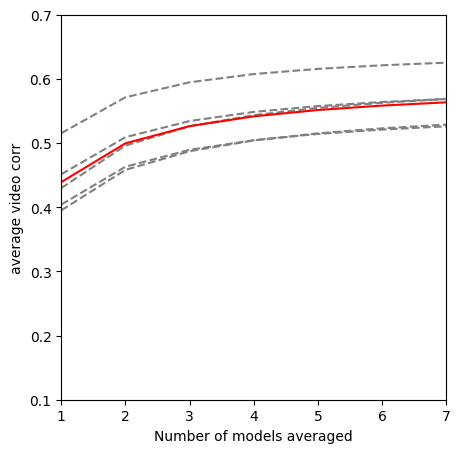

In [740]:
## plot performance  
fig, axs = plt.subplots(1,1, figsize=(5, 5))
# axs.errorbar(range(1, model_list.size+1), corr_avg_per_sample_size_mean,
#         yerr=[corr_avg_per_sample_std], fmt='o-')
for mouse in range(len(mice)):
    axs.plot(range(1, model_list.size+1), corr_allmice_per_sample_size[:,mouse], label=f'mouse{mouse}', linestyle='--',color='grey')
axs.plot(range(1, model_list.size+1), corr_allmice_per_sample_size.mean(axis=1), label='mean', color='r')

# axs.plot(range(1, model_list.size+1), corr_avg_per_sample_size_mean_rand, label='mean_rand', color='y', linestyle='--')
axs.set_xlabel('Number of models averaged')
axs.set_ylabel('average video corr')
axs.set_xlim([1, model_list.size])
axs.set_ylim([0.1, 0.7])
axs.set_box_aspect(1)

f_stats = sp.stats.f_oneway(corr_allmice_per_sample_size[0],
                  corr_allmice_per_sample_size[1],
                  corr_allmice_per_sample_size[2],
                  corr_allmice_per_sample_size[3],
                  corr_allmice_per_sample_size[4],
                  corr_allmice_per_sample_size[5])

print('one-way ANOVA p = ', f_stats.pvalue)

# save figure as svg
fig.savefig('../reconstructions/ensembling_effect.svg', format='svg')

percentage_improvements = (corr_avg_per_sample_size_mean[1:]/np.roll(corr_avg_per_sample_size_mean,1)[1:])*100-100
# percentage_improvements[0]=0
print('before ensembling: ', corr_avg_per_sample_size_mean[0])
print('after ensembling: ', corr_avg_per_sample_size_mean[-1])
print('correlation increase through ensembling: ', corr_avg_per_sample_size_mean[-1]/corr_avg_per_sample_size_mean[0]*100-100, '%')
print('% ','increase for each addition of a model: ', percentage_improvements)


In [741]:
# distribution of correlation values for full model
vid_corr_values_all = np.zeros((len(mice),len(trials)))
frame_corr_values_all = np.zeros((len(mice),len(trials)))
rand_vid_corr_values_all = np.zeros((len(mice),len(trials)))
rand_frame_corr_values_all = np.zeros((len(mice),len(trials)))
for mouse in mice:
    for trial in trials:
            
        
        vid_corr_values=imsim.reconstruction_video_corr(video_gt[mouse,trial],
                video_pred_Amean_all[mouse,trial],
                np.where(mask[mouse] >= mask_th,1,0))
        frame_corr_values=imsim.reconstruction_video_mean_frame_corr(video_gt[mouse,trial],
                video_pred_Amean_all[mouse,trial],
                np.where(mask[mouse] >= mask_th,1,0))
        
        # exclude randomly chosen movies which are actually duplicates
        same_movie_test = True
        while same_movie_test:
                random_trial = np.random.choice([x for x in range(len(trials)) if x != trial])
                if np.corrcoef(video_gt[mouse,trial].flatten(),video_gt[mouse,random_trial].flatten())[0,1] > 0.9:
                        same_movie_test = True
                else:
                        same_movie_test = False
        
        rand_vid_corr_values=imsim.reconstruction_video_corr(video_gt[mouse,random_trial],
                video_pred_Amean_all[mouse,trial],
                np.where(mask[mouse] >= mask_th,1,0))
        rand_frame_corr_values=imsim.reconstruction_video_mean_frame_corr(video_gt[mouse,random_trial],
                video_pred_Amean_all[mouse,trial],
                np.where(mask[mouse] >= mask_th,1,0))
        
        vid_corr_values_all[mouse,trial] = vid_corr_values
        frame_corr_values_all[mouse,trial] = frame_corr_values
        rand_vid_corr_values_all[mouse,trial] = rand_vid_corr_values
        rand_frame_corr_values_all[mouse,trial] = rand_frame_corr_values
        

        

mean vid corr 0.5634841157508851 , CI  (0.5342884781326931, 0.5926797533690771) , ttest from shuffled p  8.656073659202288e-45
mean frame corr 0.4999453851460418 , CI  (0.4678288596528498, 0.5320619106392338) , ttest from shuffled p  3.271030421382364e-38


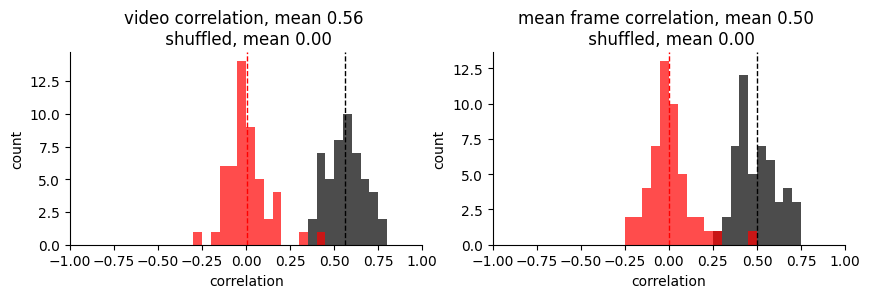

In [742]:
fig, ax = plt.subplots(1, 2, figsize=(10, 2.5))
bins = np.arange(-1,1.1,0.05)
ax[0].hist(vid_corr_values_all.flatten(), bins=bins, color='k', alpha=0.7, label='video')
ax[0].hist(rand_vid_corr_values_all.flatten(), bins=bins, color='r', alpha=0.7, label='video_rand')
ax[0].axvline(np.mean(vid_corr_values_all), color='k', linestyle='dashed', linewidth=1)
ax[0].axvline(np.mean(rand_vid_corr_values_all), color='r', linestyle='dashed', linewidth=1)
ax[0].set_title(f'video correlation, mean {np.nanmean(vid_corr_values_all):.2f} \n shuffled, mean {np.nanmean(rand_vid_corr_values_all):.2f}')
ax[0].set_xlabel('correlation')
ax[0].set_ylabel('count')
ax[0].set_xlim([-1,1])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].hist(frame_corr_values_all.flatten(), bins=bins, color='k', alpha=0.7, label='frame')
ax[1].hist(rand_frame_corr_values_all.flatten(), bins=bins, color='r', alpha=0.7, label='frame_rand')
ax[1].axvline(np.nanmean(frame_corr_values_all), color='k', linestyle='dashed', linewidth=1)
ax[1].axvline(np.nanmean(rand_frame_corr_values_all), color='r', linestyle='dashed', linewidth=1)
ax[1].set_title(f'mean frame correlation, mean {np.nanmean(frame_corr_values_all):.2f} \n shuffled, mean {np.nanmean(rand_frame_corr_values_all):.2f}')
ax[1].set_xlabel('correlation')
ax[1].set_ylabel('count')
ax[1].set_xlim([-1,1])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig('../reconstructions/overall_performance.svg', format='svg')

# n = 50 videos
mean_corr = np.mean(vid_corr_values_all.flatten())
sem_corr = sp.stats.sem(vid_corr_values_all.flatten())
t_score = sp.stats.t.ppf((1+0.95)/2,len(vid_corr_values_all.flatten())-1)
ci_vc = (mean_corr - sem_corr*t_score , mean_corr + sem_corr*t_score)

mean_corr = np.mean(rand_vid_corr_values_all.flatten())
sem_corr = sp.stats.sem(rand_vid_corr_values_all.flatten())
t_score = sp.stats.t.ppf((1+0.95)/2,len(rand_vid_corr_values_all.flatten())-1)
ci_vc_shuffled = (mean_corr - sem_corr*t_score , mean_corr + sem_corr*t_score)

mean_corr = np.mean(frame_corr_values_all.flatten())
sem_corr = sp.stats.sem(frame_corr_values_all.flatten())
t_score = sp.stats.t.ppf((1+0.95)/2,len(frame_corr_values_all.flatten())-1)
ci_fc = (mean_corr - sem_corr*t_score , mean_corr + sem_corr*t_score)

mean_corr = np.mean(rand_frame_corr_values_all.flatten())
sem_corr = sp.stats.sem(rand_frame_corr_values_all.flatten())
t_score = sp.stats.t.ppf((1+0.95)/2,len(rand_frame_corr_values_all.flatten())-1)
ci_fc_shuffled = (mean_corr - sem_corr*t_score , mean_corr + sem_corr*t_score)

ttest_vid_vc = sp.stats.ttest_ind(vid_corr_values_all.flatten(), rand_vid_corr_values_all.flatten())
ttest_vid_fc = sp.stats.ttest_ind(frame_corr_values_all.flatten(), rand_frame_corr_values_all.flatten())
# # calculate vid_corr_values confidence intervals using scipy.stats, this is the CI for the difference in means
# ci_vc = ttest_vid_vc.confidence_interval(0.95)
# ci_fc = ttest_vid_fc.confidence_interval(0.95)

print('mean vid corr', np.mean(vid_corr_values_all), ', CI ',ci_vc,', ttest from shuffled p ',ttest_vid_vc.pvalue)
print('mean frame corr', np.mean(frame_corr_values_all), ', CI ',ci_fc,', ttest from shuffled p ',ttest_vid_fc.pvalue)

In [715]:
print('video correlation for each mouse: ', vid_corr_values_all.mean(1))

video correlation for each mouse:  [0.52604817 0.56862159 0.62532084 0.56870637 0.52872361]


In [716]:
def video_energy(video, mask):
    # ground_truth: (time, height, width)
    # mask: (height, width) or (time, height, width)
    # returns: (time, height, width)
    
    if len(mask.shape) == 3:
        mask = mask[0, :, :] # make 2D
    idx_inmask = mask.flatten() == 1
    video.swapaxes(0, -1) # height, width,time
    video = video.reshape(video.shape[0],-1) # flatten spatial dimensions
    video.swapaxes(-1, 0) # time, height*width
    video = video[:,idx_inmask] # mask spatial dimensions
    frame_energy = np.mean(np.abs(np.diff(video, axis=0)),axis=(1)) # sum of absolute differences (motion energy)
    
    return frame_energy

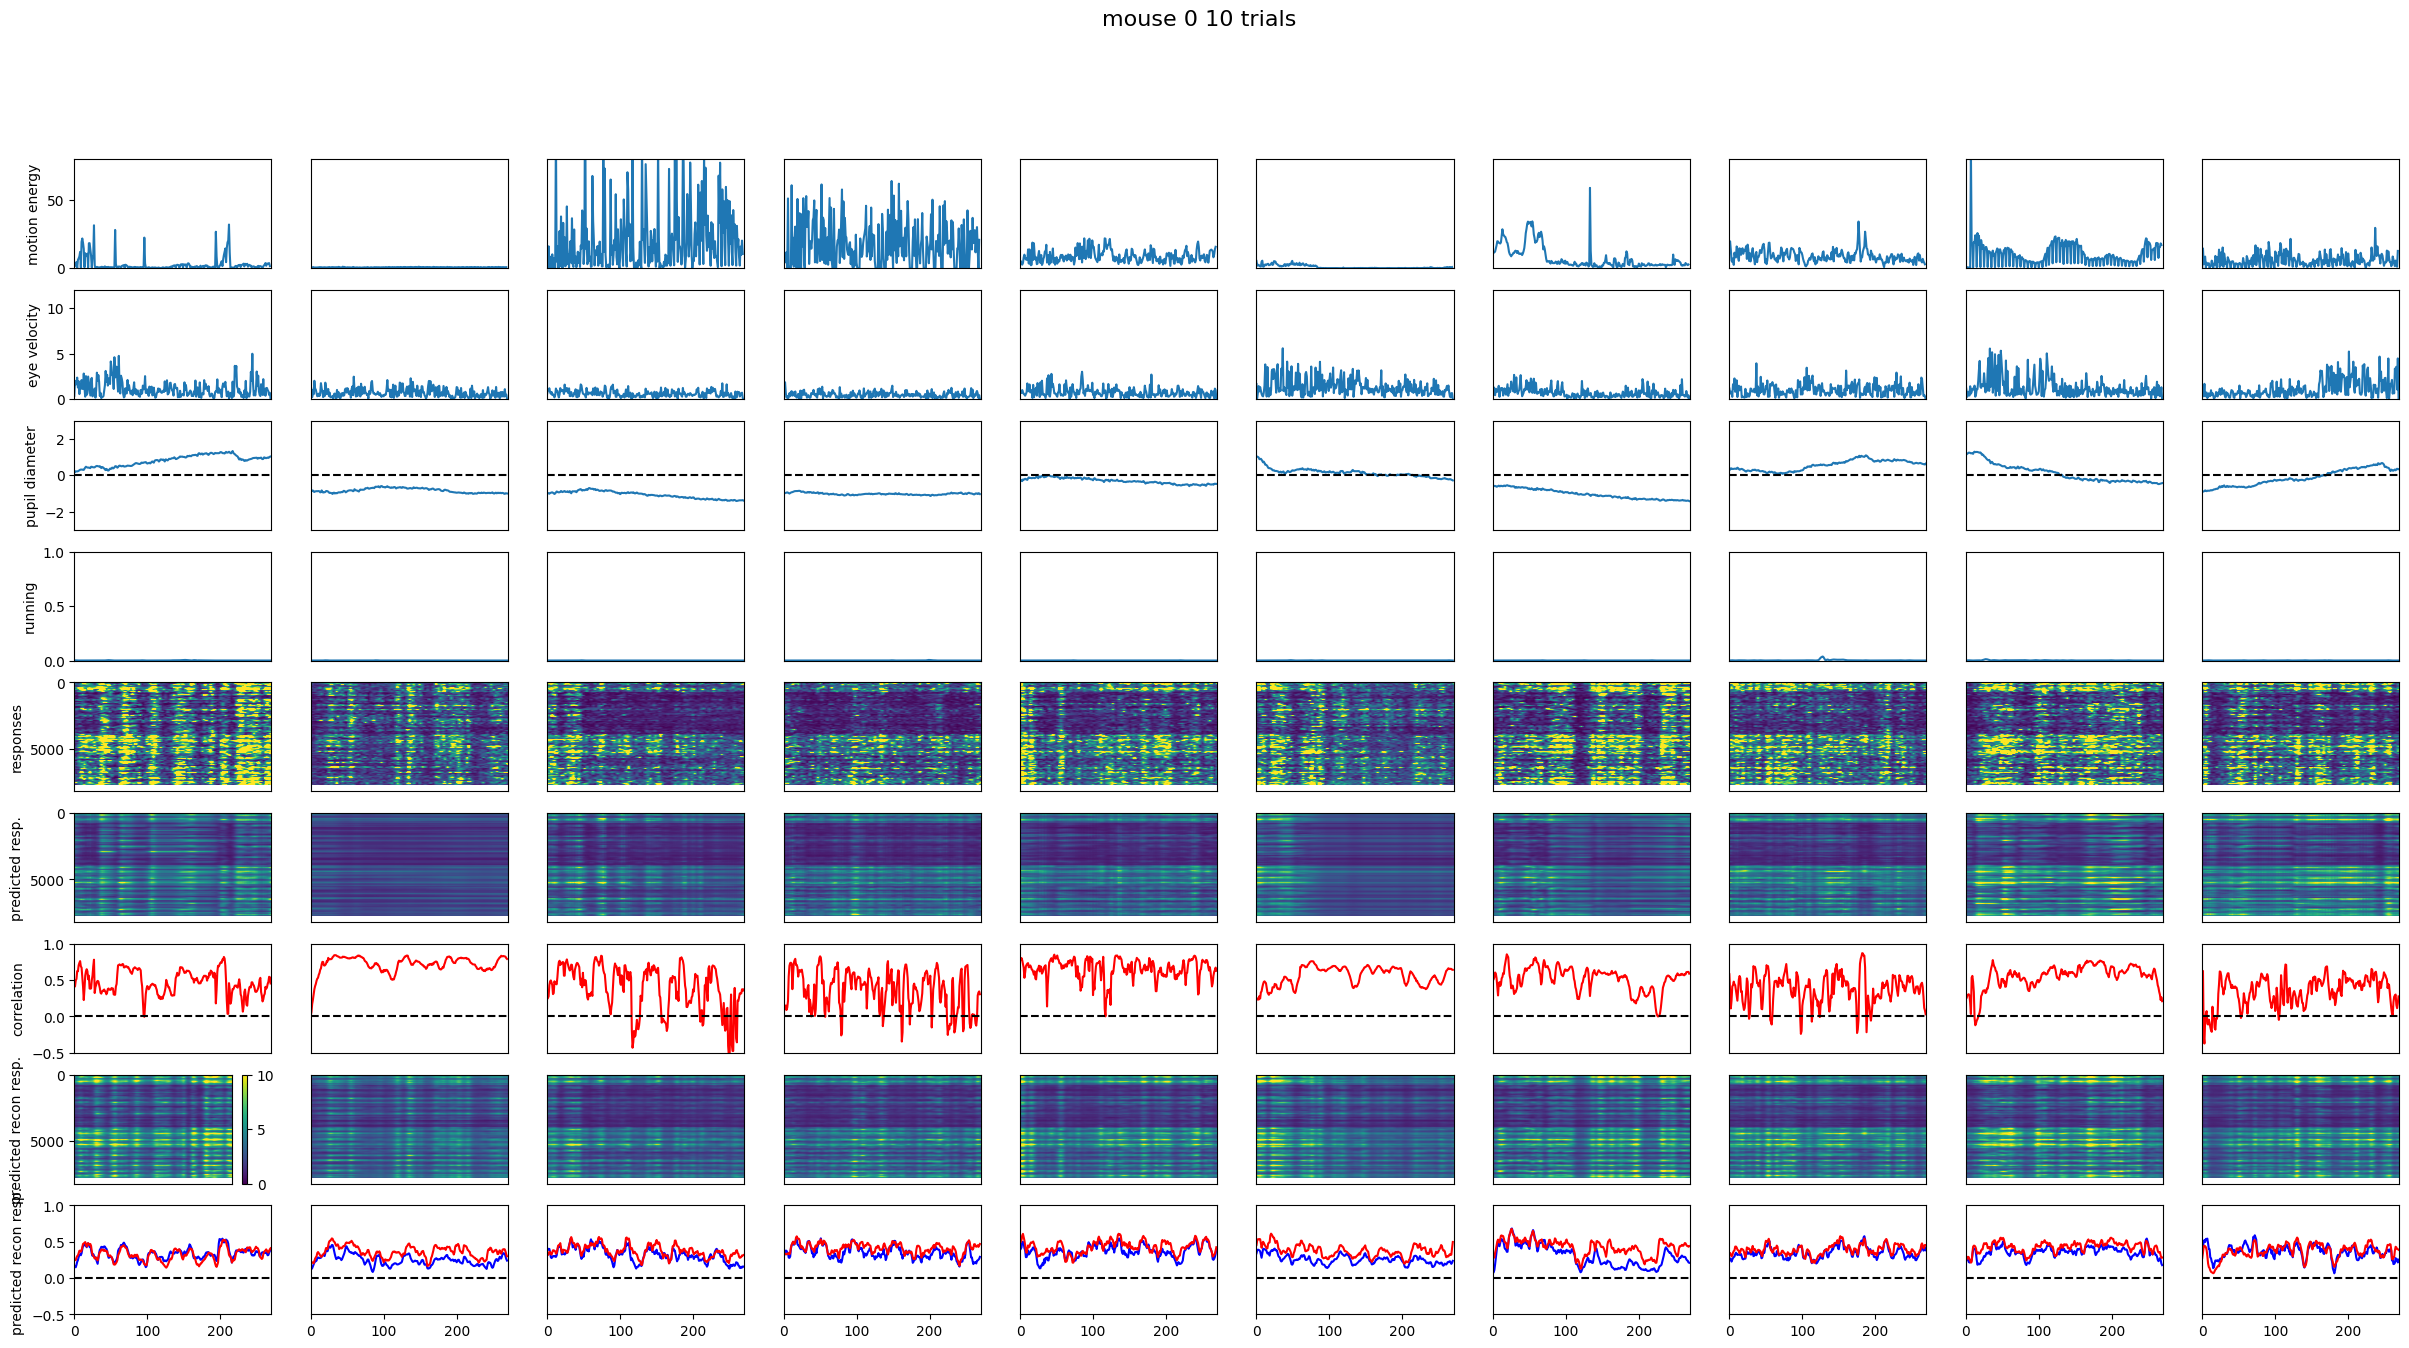

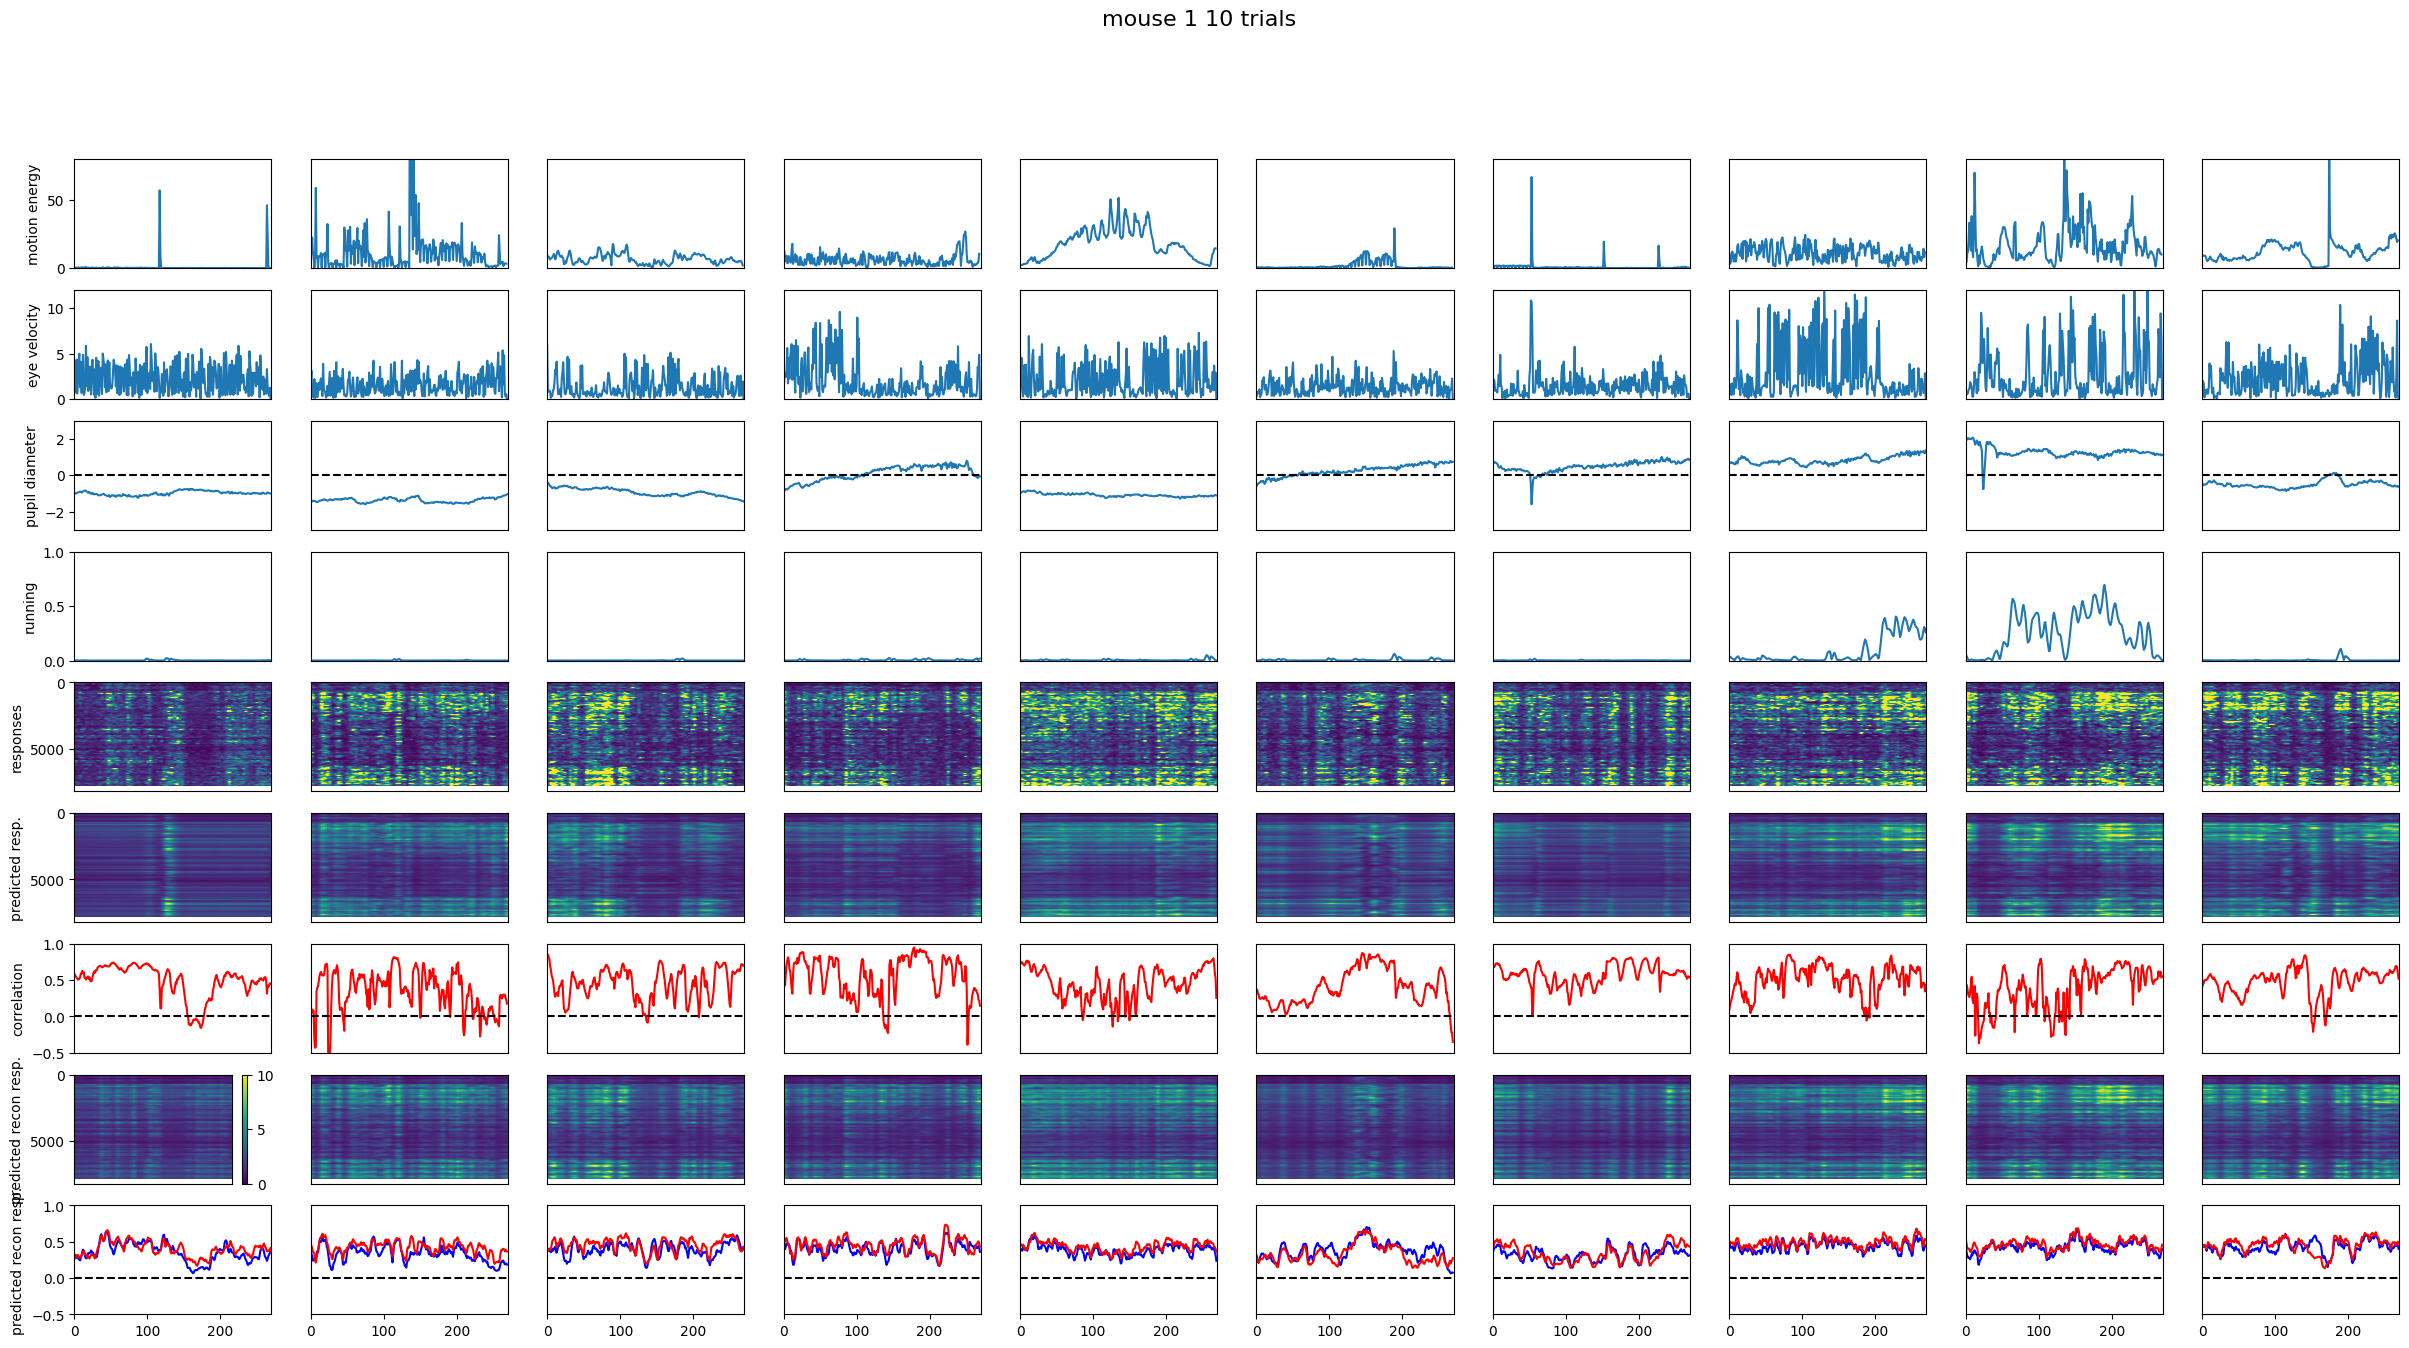

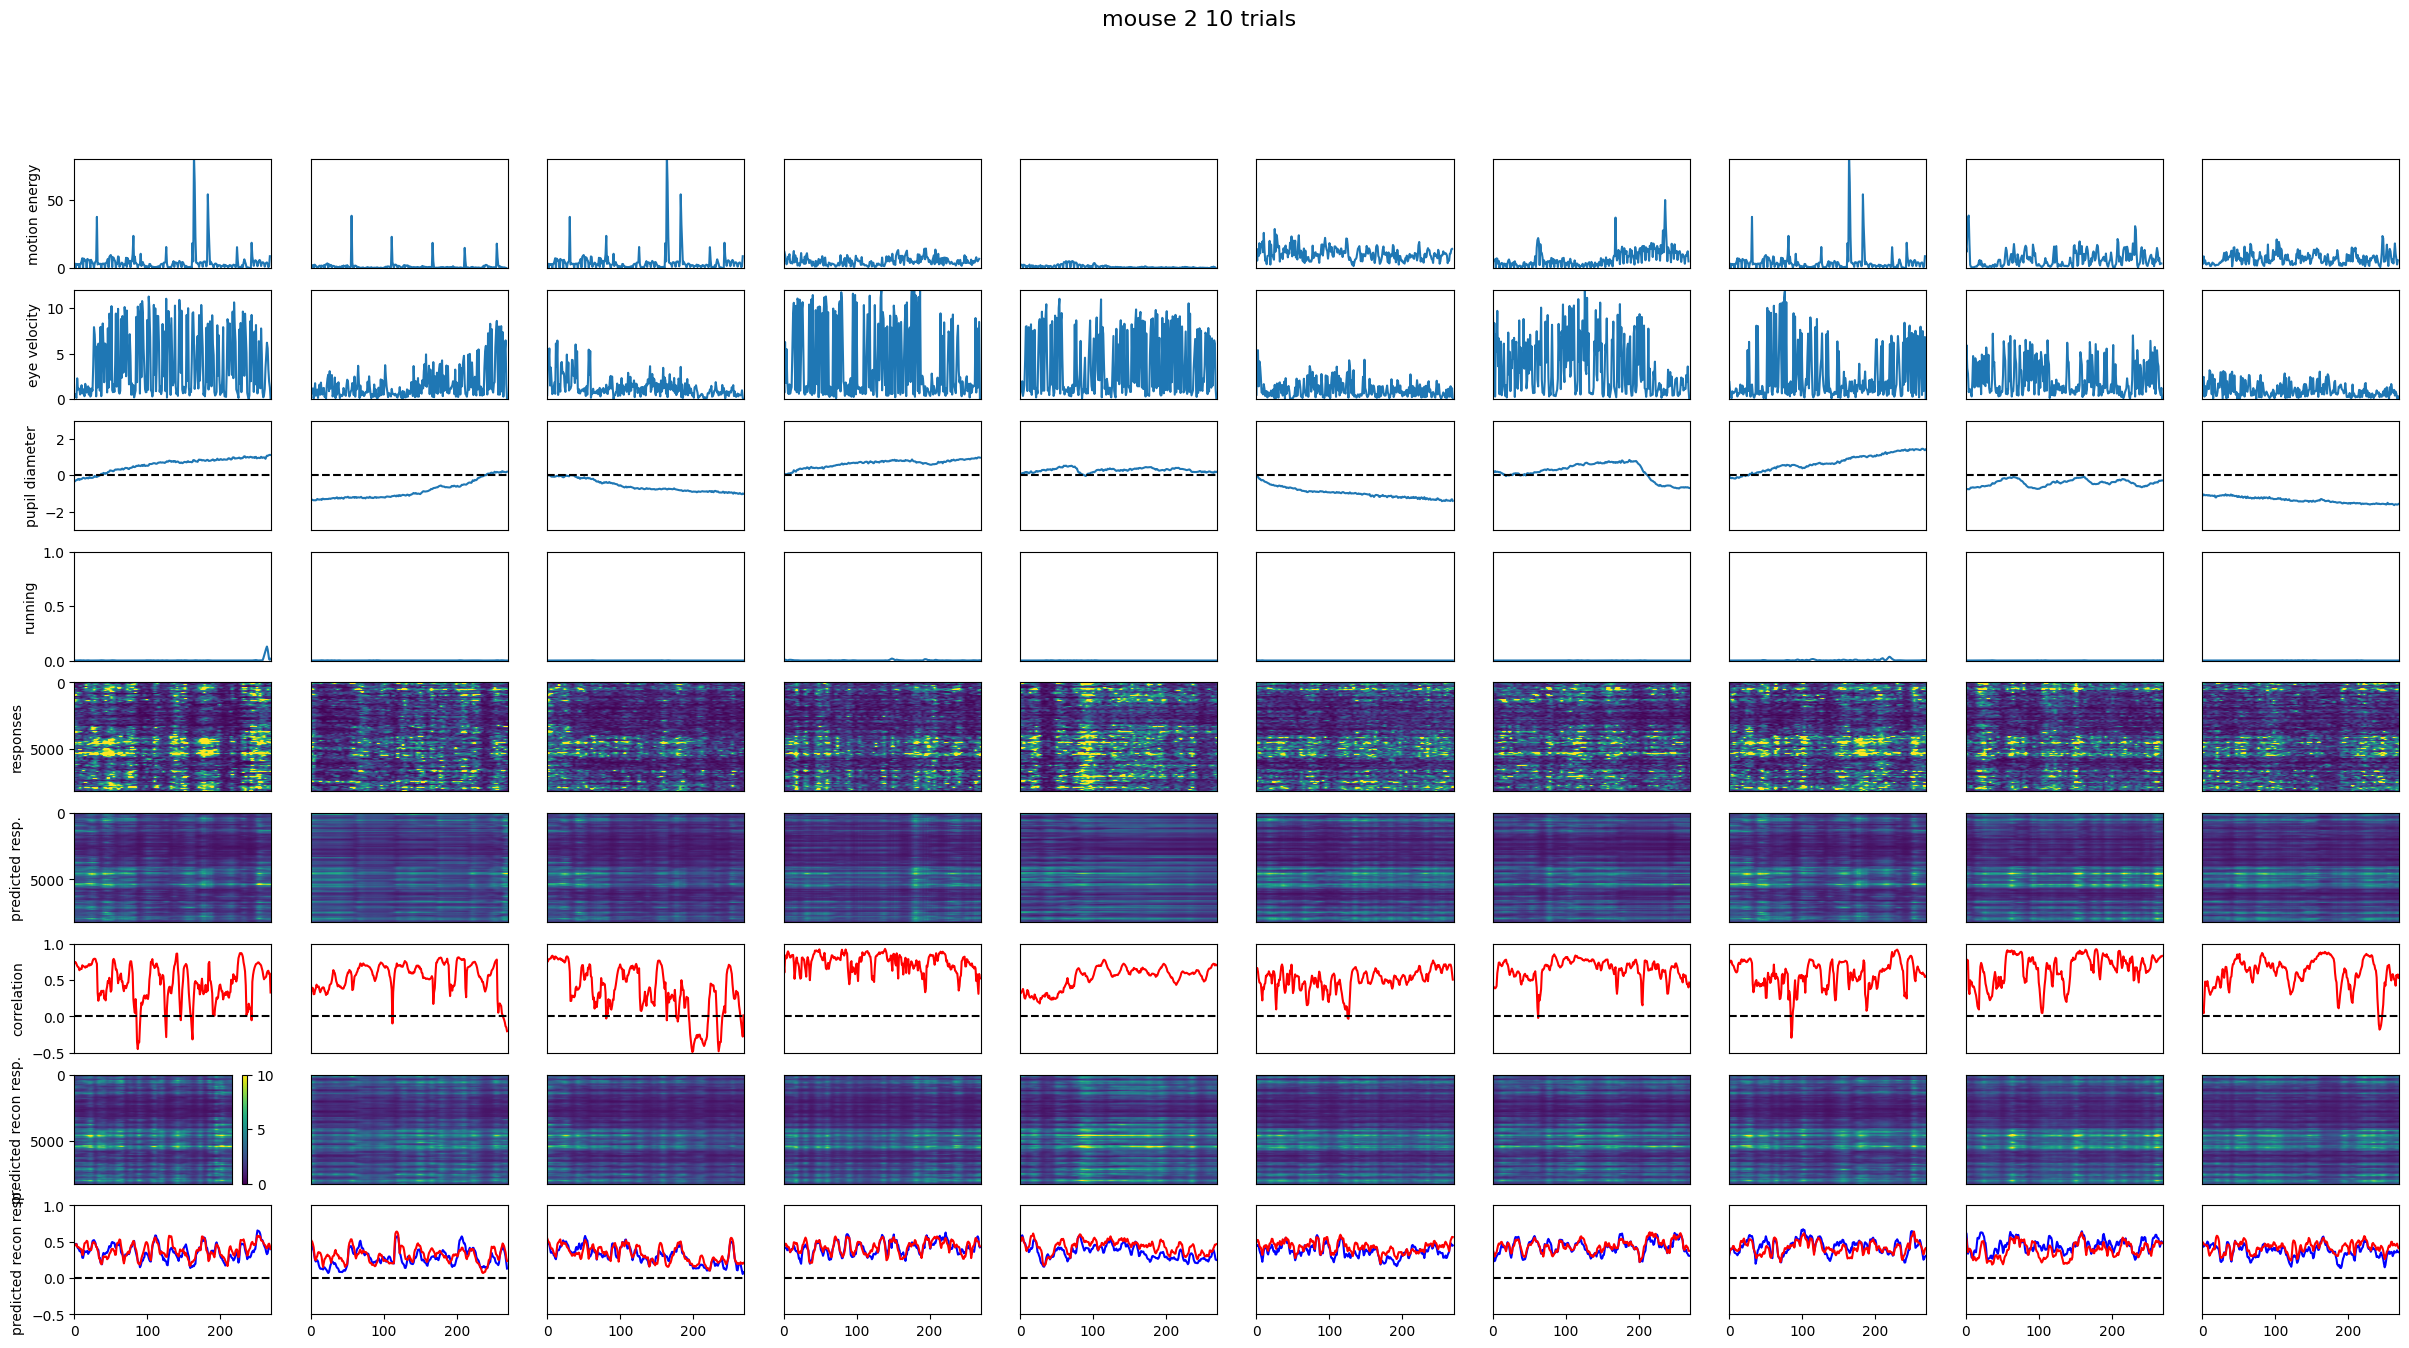

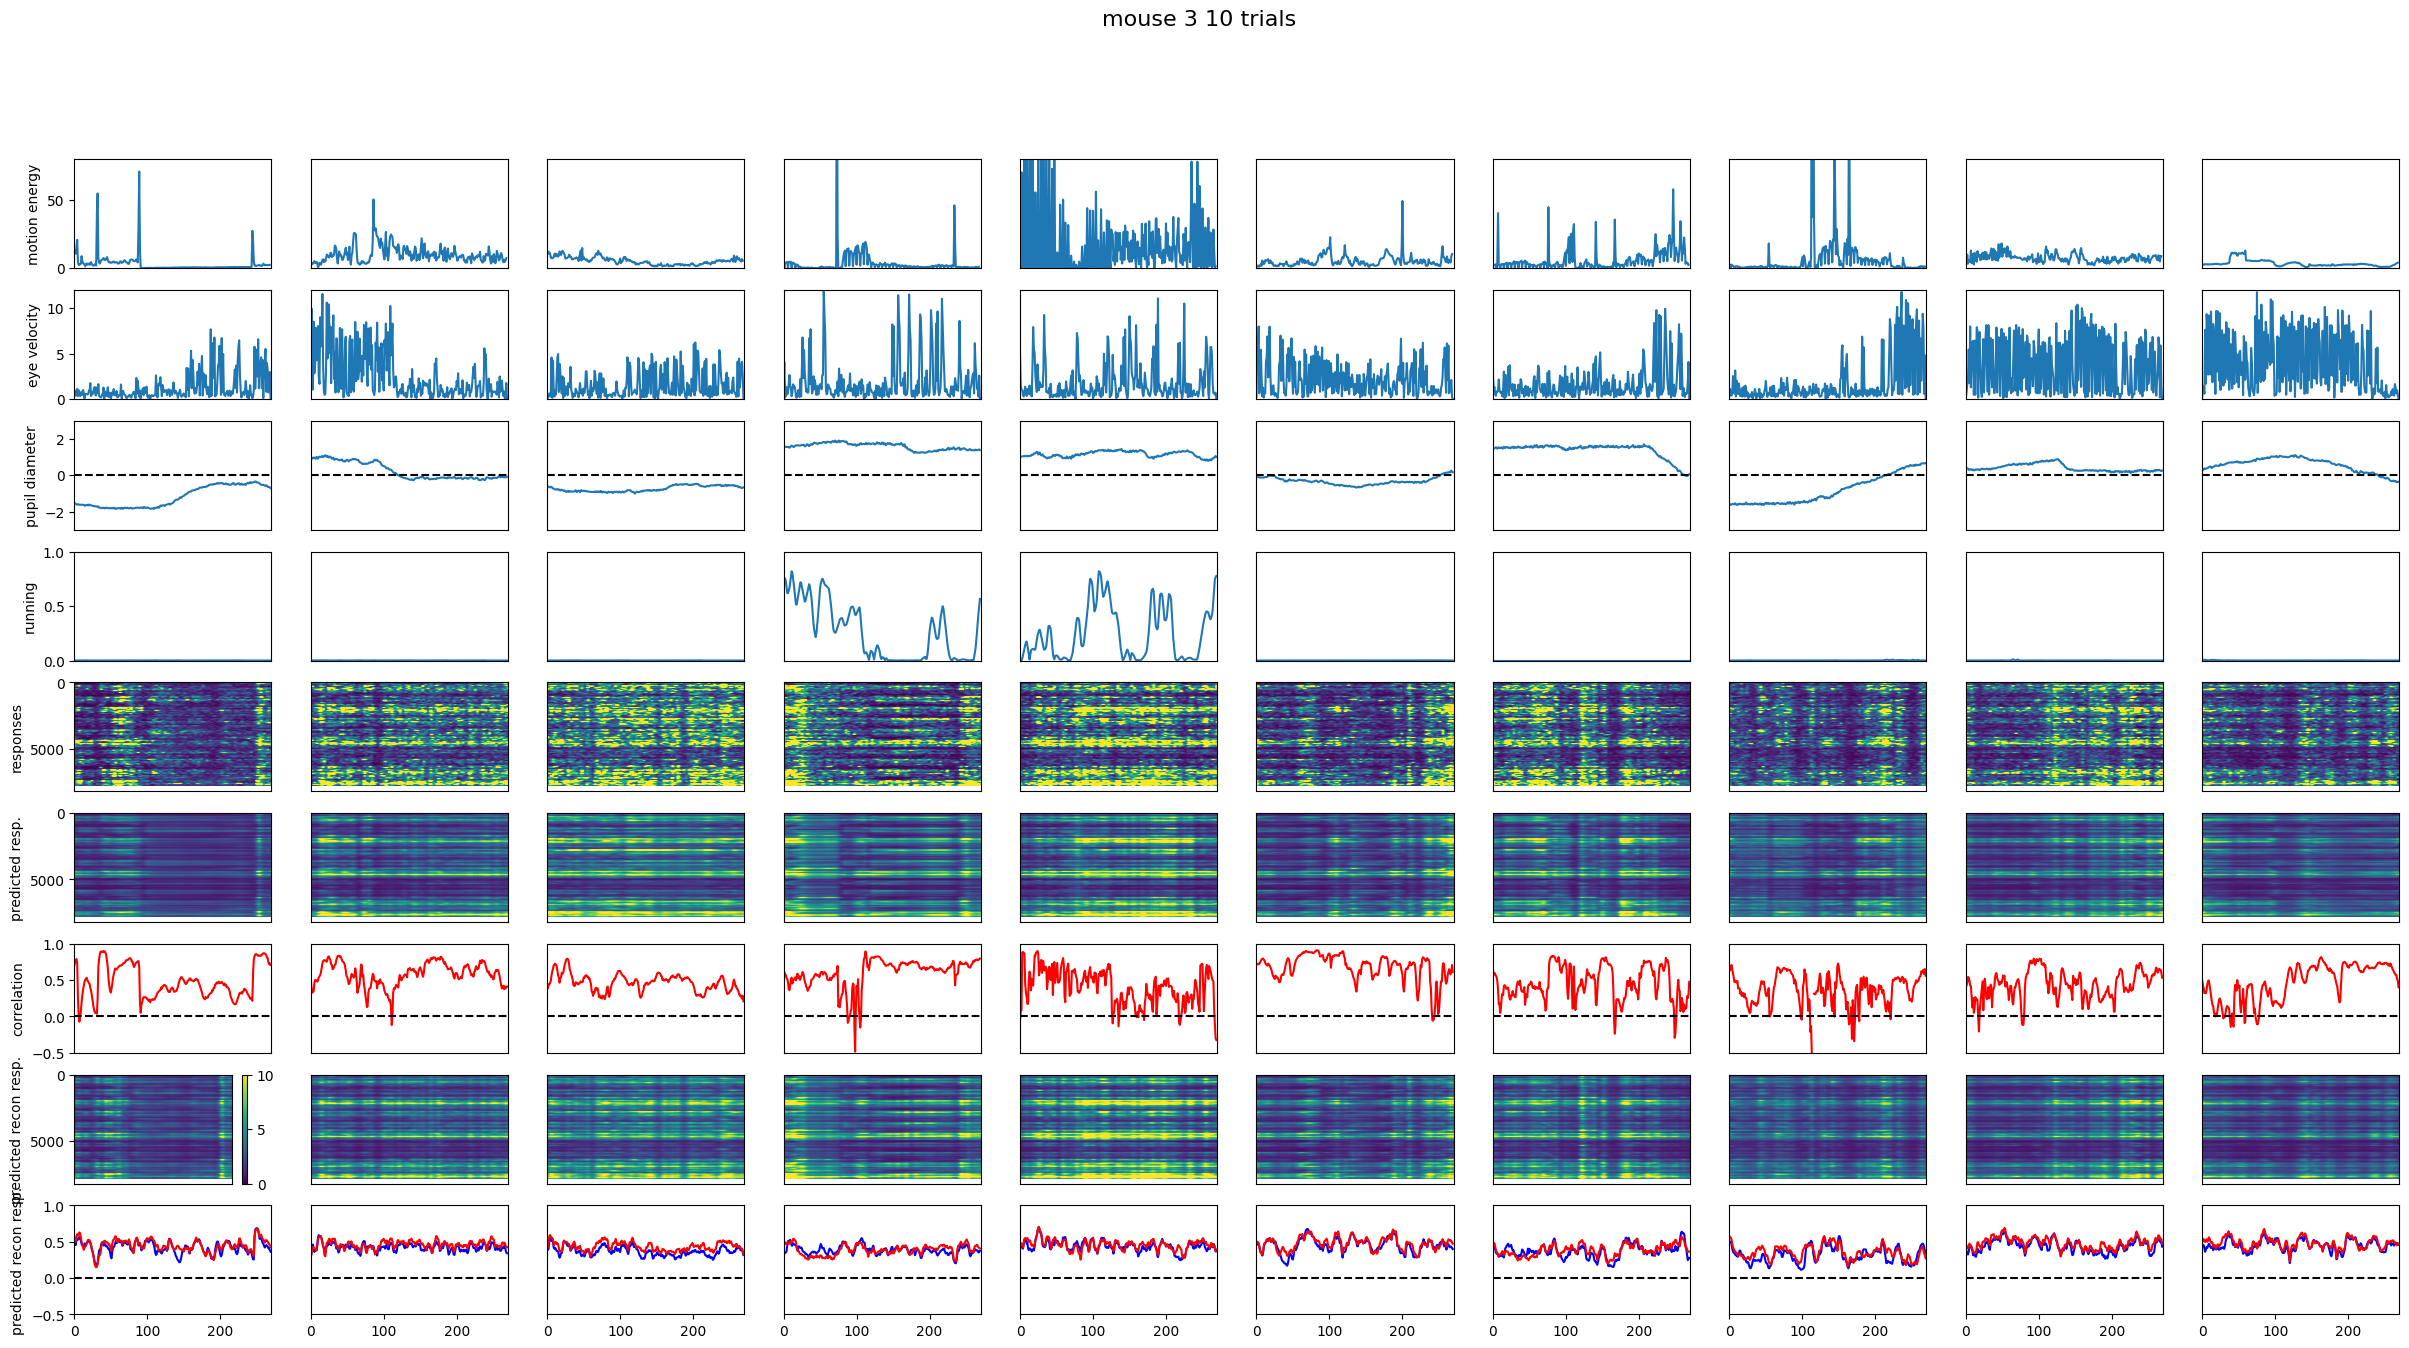

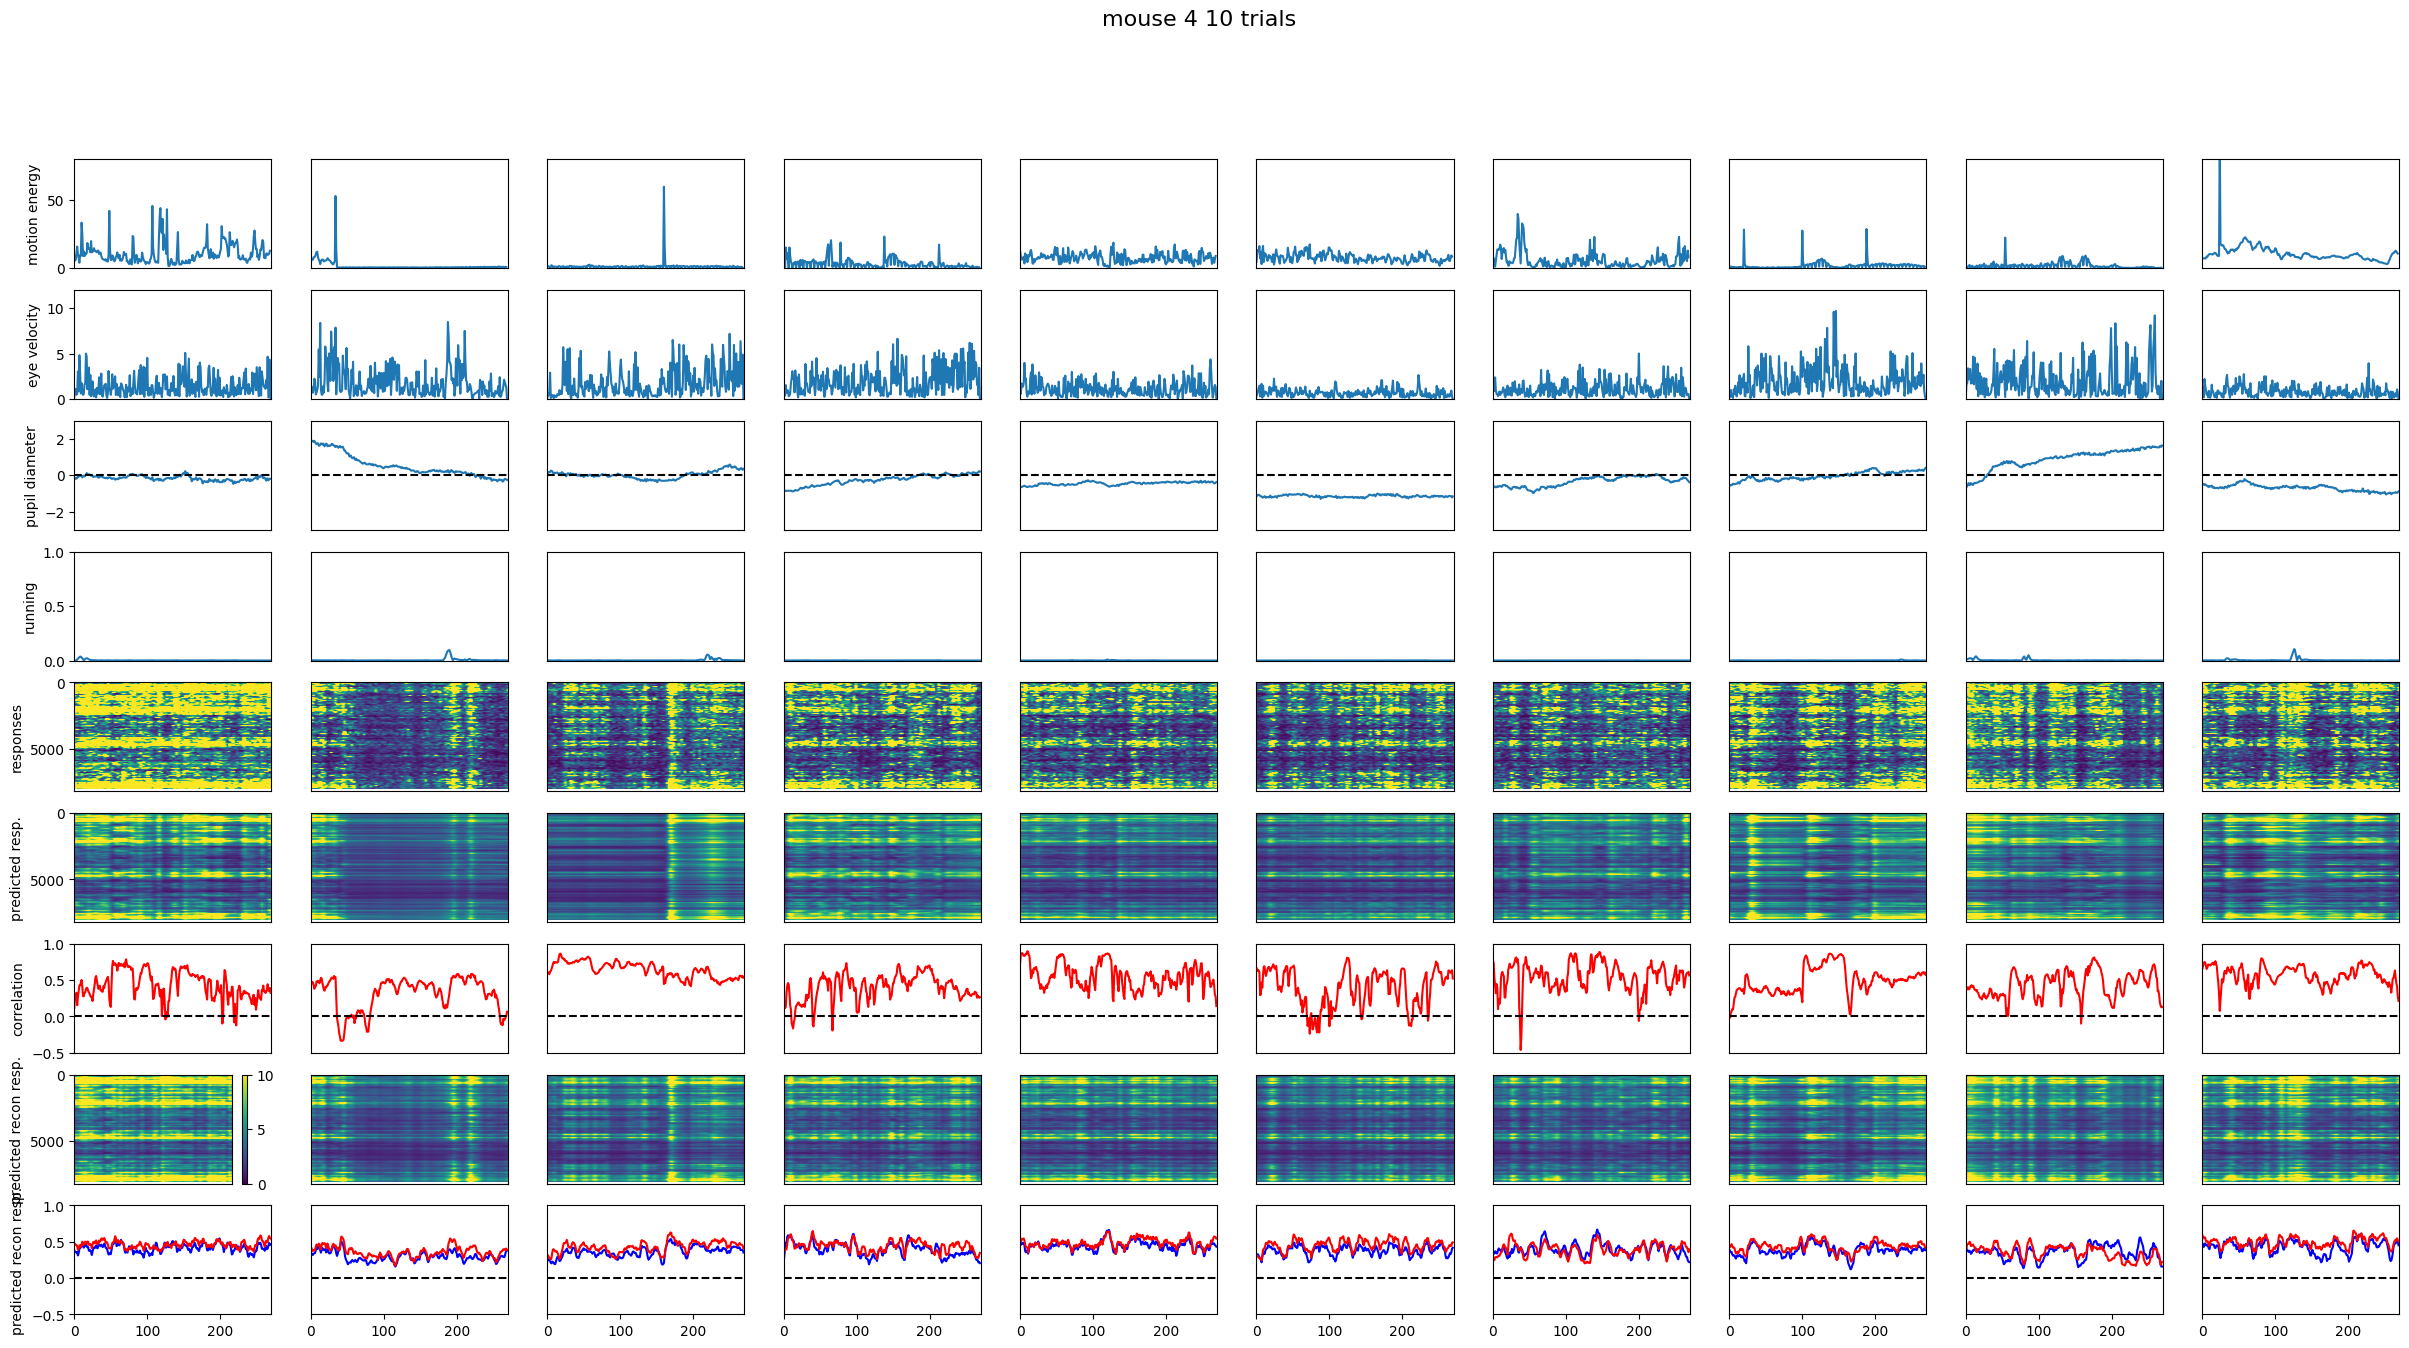

In [717]:
## Ethograms
# video_gt:  (1, 7, 268, 36, 64) 0.0 255.00000000000006
# behavior:  (1, 7, 2, 268) 0.0 61.87945526558643
# pupil_center:  (1, 7, 2, 268) 144.45310913443313 159.28150493647257
# responses:  (1, 7, 8202, 268) nan nan
# responses_pred_gt:  (6, 1, 7, 8202, 268) nan nan
# video_pred:  (6, 1, 7, 268, 36, 64) -345.120361328125 641.8395385742188
# mask:  (1, 36, 64) 0.0020975989755243063 1.4469200372695923
# responses_pred_recon:  (6, 1, 7, 8202, 268) nan nan
# video_pred_Amean_all: (1, 7, 268, 36, 64) 

trial_num = 10
video_gt_motion_energy_all=[]
eye_velocity_all=[]
pupil_diam_all=[]
running_all=[]
corr_gt_pred_all=[]
respcorr_gt_pred_all=[]
respcorr_gt_rec_pred_all=[]

for mouse in range(0,len(mice)):

    fig, axs = plt.subplots(9,trial_num, figsize=(30, 15))
    fig.suptitle(f'mouse {mouse} {trial_num} trials', fontsize=16)

    mouse_name = mouse_names[mouse]
    cell_pos_file_name = f'../data/sensorium_all_2023/{mouse_name}/meta/statistics/behavior/all/max.npy'
    behavior_max=np.nanmax(np.load(cell_pos_file_name),axis=1)
    cell_pos_file_name = f'../data/sensorium_all_2023/{mouse_name}/meta/statistics/behavior/all/min.npy'
    behavior_min=np.nanmin(np.load(cell_pos_file_name),axis=1)
    cell_pos_file_name = f'../data/sensorium_all_2023/{mouse_name}/meta/statistics/behavior/all/mean.npy'
    behavior_mean=np.nanmean(np.load(cell_pos_file_name),axis=1)
    cell_pos_file_name = f'../data/sensorium_all_2023/{mouse_name}/meta/statistics/behavior/all/std.npy'
    behavior_std=np.nanmean(np.load(cell_pos_file_name),axis=1)

    for trial in range(0,trial_num):
        frames = video_gt.shape[-3]
        
        # normalize motion energy
        # video_gt_motion_energy = imsim.video_energy(video_gt[mouse,trial], np.where(mask[mouse] >= mask_th,1,0))
        # video_pred_motion_energy = imsim.video_energy(video_pred_Amean_all[mouse,trial], np.where(mask[mouse] >= mask_th,1,0))
        video_gt_motion_energy = video_energy(video_gt[mouse,trial], np.where(mask[mouse] >= mask_th,1,0))
        video_pred_motion_energy = video_energy(video_pred_Amean_all[mouse,trial], np.where(mask[mouse] >= mask_th,1,0))
        
        # normalize eye position
        eye_position = pupil_center[mouse,trial,:,:].copy()

        # calculate eye velocity
        eye_velocity = np.sqrt(np.diff(eye_position[0])**2 + np.diff(eye_position[1])**2)
        eye_velocity = np.concatenate((eye_velocity, [0]))

        # normalize pupil diameter
        # mouse_mean_pupil_diam = np.mean(behavior[mouse,:,0])
        # mouse_std_pupil_diam = np.std(behavior[mouse,:,0])
        mouse_mean_pupil_diam = behavior_mean[0]
        mouse_std_pupil_diam = behavior_std[0]
        pupil_diam = behavior[mouse,trial,0].copy()
        pupil_diam = (pupil_diam-mouse_mean_pupil_diam)/mouse_std_pupil_diam

        # normalize running
        # mouse_max_running = np.max(behavior[mouse,0:trial_num,1])
        mouse_max_running = behavior_max[1]
        running = behavior[mouse,trial,1,:].copy()
        running = running/mouse_max_running

        responses_current = responses[mouse,trial]
        predicted_responses_current = responses_pred_gt[:,mouse,trial].mean(axis=0) # average over models
        predicted_recon_responses_current = responses_pred_recon[:,mouse,trial].mean(axis=0) # average over models

        # correlation between gt and pred
        video_flatframe_gt = apply_flatten_with_masking(video_gt[mouse:mouse+1,trial:trial+1],mask,keep_frames=True)
        video_flatframe_pred = apply_flatten_with_masking(video_pred_Amean_all[mouse:mouse+1,trial:trial+1],mask,keep_frames=True)
        corr_gt_pred = np.zeros((video_gt.shape[-3]))
        respcorr_gt_pred = np.zeros((video_gt.shape[-3]))
        respcorr_gt_rec_pred = np.zeros((video_gt.shape[-3]))
        for frame in range(frames):
            corr_gt_pred[frame] = np.corrcoef(video_flatframe_gt[0][0,frame], video_flatframe_pred[0][0,frame])[0,1]
            resp_temp = responses_current[:,frame]
            pred_resp_temp = predicted_responses_current[:,frame]
            pred_from_recon_resp_temp = predicted_recon_responses_current[:,frame]
            
            # remove nans
            idx_nans = np.isnan(resp_temp.flatten()) | np.isnan(pred_resp_temp.flatten()) | np.isnan(pred_from_recon_resp_temp.flatten())
            
            respcorr_gt_pred[frame] = np.corrcoef(resp_temp.flatten()[~idx_nans], pred_resp_temp.flatten()[~idx_nans])[0,1]
            respcorr_gt_rec_pred[frame] = np.corrcoef(resp_temp.flatten()[~idx_nans], pred_from_recon_resp_temp.flatten()[~idx_nans])[0,1]
        
        
        # plot    
        # axs[3,trial].plot(video_gt_motion_energy/video_gt_motion_energy.max(), label='gt')
        axs[0,trial].plot(video_gt_motion_energy, label='gt')
        axs[0,trial].set_ylim([0,80])
        axs[0,trial].set_xlim([0,frames])
        axs[0,trial].set_xticks([])
        if trial>0:
            axs[0,trial].set_yticks([])
            
        axs[1,trial].plot(eye_velocity)
        axs[1,trial].set_ylim([0,12])
        axs[1,trial].set_xlim([0,frames])
        axs[1,trial].set_xticks([])
        if trial>0:
            axs[1,trial].set_yticks([])
        
        axs[2,trial].plot(pupil_diam)
        axs[2,trial].axhline(0, color='k', linestyle='--')
        axs[2,trial].set_ylim([-3,3])
        axs[2,trial].set_xlim([0,frames])
        axs[2,trial].set_xticks([])
        if trial>0:
            axs[2,trial].set_yticks([])
            
        axs[3,trial].plot(running)
        axs[3,trial].set_ylim([0,1])
        axs[3,trial].set_xlim([0,frames])
        axs[3,trial].set_xticks([])
        if trial>0:
            axs[3,trial].set_yticks([])
                    
        axs[4,trial].imshow(responses_current, aspect='auto',vmin=0,vmax=10)
        axs[4,trial].set_xticks([])
        if trial>0:
            axs[4,trial].set_yticks([])
            
        axs[5,trial].imshow(predicted_responses_current, aspect='auto',vmin=0,vmax=10)
        axs[5,trial].set_xticks([])
        if trial>0:
            axs[5,trial].set_yticks([])
            
        axs[6,trial].plot(corr_gt_pred, label='gt vs pred', color='r')
        axs[6,trial].axhline(0, color='k', linestyle='--')
        axs[6,trial].set_ylim([-0.5,1])
        axs[6,trial].set_xlim([0,frames])
        axs[6,trial].set_xticks([])
        if trial>0: 
            axs[6,trial].set_yticks([])
            
        axs[7,trial].imshow(predicted_recon_responses_current, aspect='auto',vmin=0,vmax=10)
        axs[7,trial].set_xticks([])
        if trial>0:
            axs[7,trial].set_yticks([])
        if trial == 0:
            cbar = fig.colorbar(axs[7,trial].imshow(predicted_recon_responses_current, aspect='auto',vmin=0,vmax=10), ax=axs[7,trial])
        
            
        axs[8,trial].plot(respcorr_gt_pred, label='gt vs pred', color='b')
        axs[8,trial].plot(respcorr_gt_rec_pred, label='gt vs pred', color='r')
        axs[8,trial].axhline(0, color='k', linestyle='--')
        axs[8,trial].set_ylim([-0.5,1])
        axs[8,trial].set_xlim([0,frames])
        if trial>0:
            axs[8,trial].set_yticks([])
            
        # save for later
        video_gt_motion_energy_all.append(video_gt_motion_energy)
        eye_velocity_all.append(eye_velocity)
        pupil_diam_all.append(pupil_diam)
        running_all.append(running)
        corr_gt_pred_all.append(corr_gt_pred)
        respcorr_gt_pred_all.append(respcorr_gt_pred)
        respcorr_gt_rec_pred_all.append(respcorr_gt_rec_pred)
        
    axs[0,0].set_ylabel('motion energy')
    axs[1,0].set_ylabel('eye velocity')
    axs[2,0].set_ylabel('pupil diameter')
    axs[3,0].set_ylabel('running')
    axs[4,0].set_ylabel('responses')
    axs[5,0].set_ylabel('predicted resp.')
    axs[6,0].set_ylabel('correlation')
    axs[7,0].set_ylabel('predicted recon resp.')
    axs[8,0].set_ylabel('predicted recon resp.')


    # save as svg
    plt.savefig(f'../reconstructions/ethogram_m{mouse}_{trial_num}trials.svg', format='svg', dpi=1200)
    plt.show()

video_gt_motion_energy_all = np.array(video_gt_motion_energy_all)
eye_velocity_all = np.array(eye_velocity_all)
pupil_diam_all = np.array(pupil_diam_all)
running_all = np.array(running_all)
corr_gt_pred_all = np.array(corr_gt_pred_all)
respcorr_gt_pred_all = np.array(respcorr_gt_pred_all)
respcorr_gt_rec_pred_all = np.array(respcorr_gt_rec_pred_all)


# does performance correlate with anything

Text(0.5, 0, 'luminance')

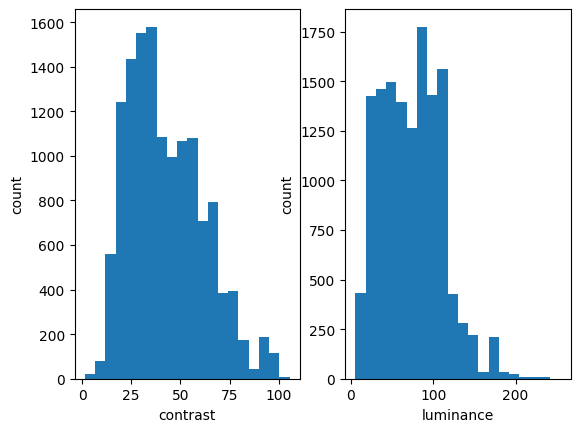

In [720]:
# calculate contrast of all ground truth videos
contrast_gt = []
luminance_gt = []
for mouse in mice:
    for trial in trials:
        contrast_gt_allframes = np.zeros((video_gt.shape[-3]))
        luminance_gt_allframes = np.zeros((video_gt.shape[-3]))
        for frame in range(video_gt.shape[-3]):
            contrast_gt_allframes[frame] = np.std(video_gt[mouse,trial,frame])
            luminance_gt_allframes[frame] = np.mean(video_gt[mouse,trial,frame])
                
        contrast_gt.append(contrast_gt_allframes)
        luminance_gt.append(luminance_gt_allframes)

contrast_gt = np.array(contrast_gt)
luminance_gt = np.array(luminance_gt)

plt.subplot(1,2,1)
plt.hist(contrast_gt.flatten(), bins=20);
plt.ylabel('count')
plt.xlabel('contrast')
plt.subplot(1,2,2)
plt.hist(luminance_gt.flatten(), bins=20);
plt.ylabel('count')
plt.xlabel('luminance')

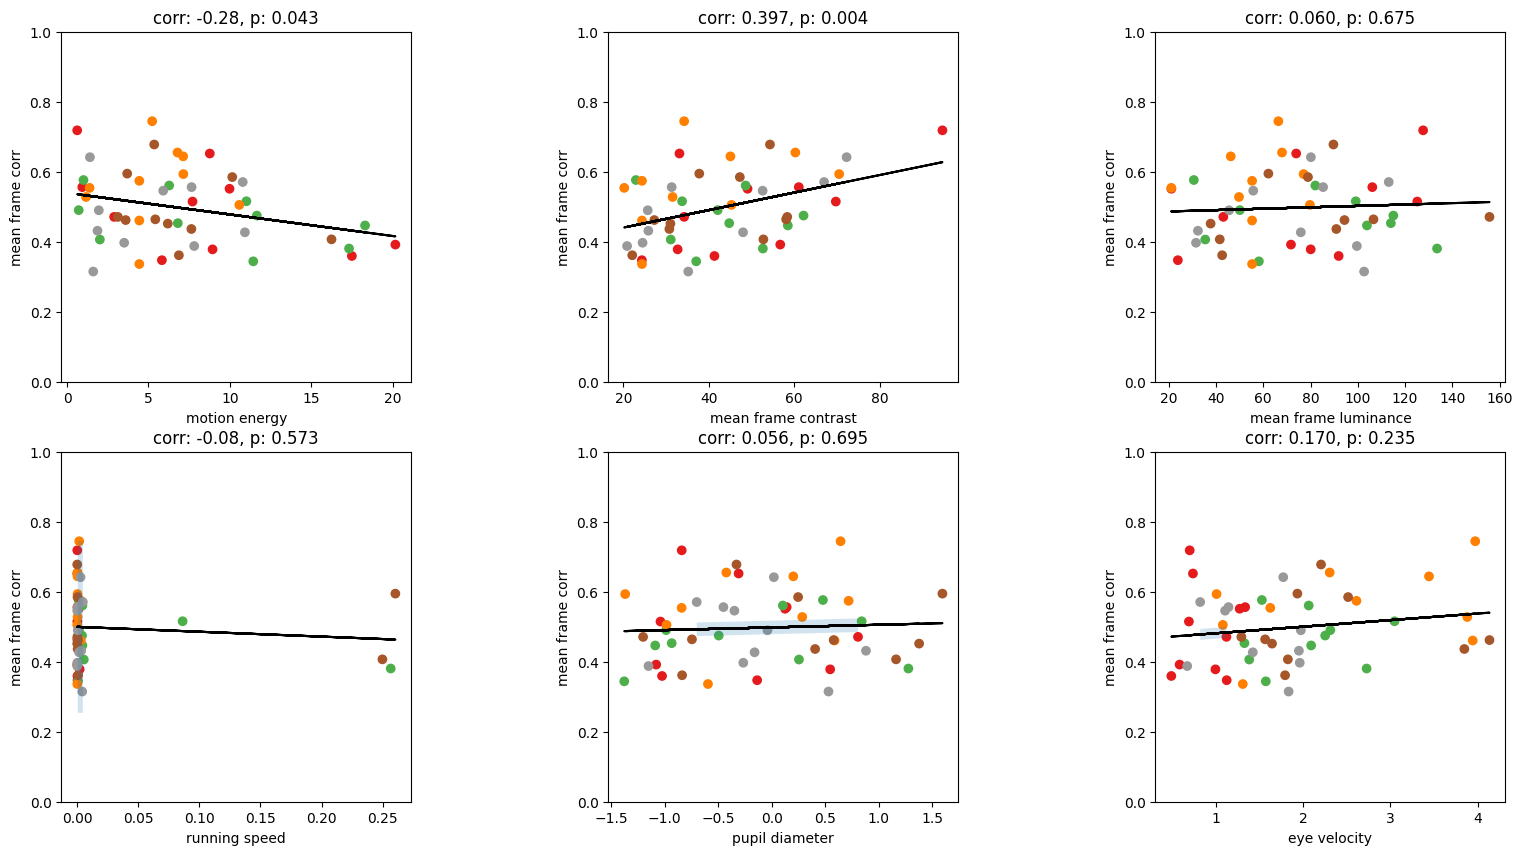

In [721]:
def make_plot(x,y,xlabel,ylabel,axs,pltxy):
    axs[pltxy[0],pltxy[1]].scatter(x,y,c=np.repeat(np.arange(0,5),10),cmap='Set1')
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(x,y)
    axs[pltxy[0],pltxy[1]].plot(x, intercept + slope*x, 'k', label='fitted line')
    axs[pltxy[0],pltxy[1]].fill_between(x, intercept + slope*x - std_err, intercept + slope*x + std_err, alpha=0.2)
    r,p=sp.stats.pearsonr(x,y)
    axs[pltxy[0],pltxy[1]].title.set_text('corr: '+str(r)[:5]+ ', p: '+ str(p)[:5])
    axs[pltxy[0],pltxy[1]].set_box_aspect(1)
    axs[pltxy[0],pltxy[1]].set_ylim([0,1])
    axs[pltxy[0],pltxy[1]].set_xlabel(xlabel)
    axs[pltxy[0],pltxy[1]].set_ylabel(ylabel)


fig, axs = plt.subplots(2,3, figsize=(20, 10))
x = video_gt_motion_energy_all.mean(axis=1)
y = np.nanmean(corr_gt_pred_all,axis=1)
make_plot(x,y,'motion energy','mean frame corr',axs,(0,0))

x = contrast_gt.mean(axis=1)
make_plot(x,y,'mean frame contrast','mean frame corr',axs,(0,1))

x = luminance_gt.mean(axis=1)
make_plot(x,y,'mean frame luminance','mean frame corr',axs,(0,2))

x = running_all.mean(axis=1)
make_plot(x,y,'running speed','mean frame corr',axs,(1,0))

x = pupil_diam_all.mean(axis=1)
make_plot(x,y,'pupil diameter','mean frame corr',axs,(1,1))

x = eye_velocity_all.mean(axis=1)
make_plot(x,y,'eye velocity','mean frame corr',axs,(1,2))

# save figure
fig.savefig('../reconstructions/performance_vs_contrast_and_behaviour.svg', format='svg')
